# Bengaluru Ola Booking Data - Exploratory Data Analysis & Showcase Project

## Project Overview
This notebook performs a comprehensive exploratory data analysis (EDA) of 50,000 Ola ride bookings in Bengaluru from January 2024. We'll analyze booking patterns, cancellation trends, vehicle performance, geographic distribution, pricing, ratings, and temporal patterns to extract actionable business insights.

## Analysis Sections:
1. **Imports & Setup** - Load required libraries
2. **Data Loading & Inspection** - Read CSV and examine structure
3. **Data Cleaning** - Handle missing values and data quality issues
4. **Univariate Analysis** - Analyze individual variable distributions
5. **Multivariate Analysis** - Explore relationships between variables
6. **Temporal & Geographic Analysis** - Identify patterns across time and location
7. **Cancellation Deep Dive** - Detailed analysis of cancellation patterns
8. **Summary Insights** - Key findings and business recommendations

## Section 1: Imports & Setup
Load all required Python libraries for data manipulation, analysis, and visualization.

In [126]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Date/time handling
from datetime import datetime
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visualization style and parameters
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## Section 2: Data Loading & Inspection
Load the CSV file and examine its structure, shape, columns, data types, and first few rows.

In [127]:
# Load the dataset from CSV
df = pd.read_csv('Bengaluru_Ola_Booking_Data.csv')

print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nDate Range: {df['Date'].min()} to {df['Date'].max()}")

DATASET OVERVIEW
Dataset Shape: 50,000 rows × 21 columns

Memory Usage: 30.42 MB

Date Range: 2024-01-01 to 2024-01-31


In [128]:
# Display all column names and data types
print("\n" + "="*80)
print("COLUMN INFORMATION")
print("="*80)
df.info()


COLUMN INFORMATION
<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               50000 non-null  str    
 1   Time                               50000 non-null  str    
 2   Booking ID                         50000 non-null  str    
 3   Booking Status                     50000 non-null  str    
 4   Customer ID                        50000 non-null  int64  
 5   Vehicle Type                       50000 non-null  str    
 6   Pickup Location                    50000 non-null  str    
 7   Drop Location                      50000 non-null  str    
 8   Avg VTAT                           33484 non-null  float64
 9   Avg CTAT                           33484 non-null  float64
 10  Cancelled Rides by Customer        50000 non-null  int64  
 11  Reason for Cancelling by Customer  3800 non-n

In [129]:
# Display first 5 rows
print("\n" + "="*80)
print("FIRST 5 ROWS OF DATA")
print("="*80)
df.head()


FIRST 5 ROWS OF DATA


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for Cancelling by Customer,Cancelled Rides by Driver,Reason for Cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Payment Method,Ride Distance,Driver Ratings,Customer Rating
0,2024-01-28,06:00:00,CNR1721175,Success,329258,Auto,Area-3,Area-2,5.42,18.46,0,NaN,0,NaN,0,NaN,868.06,Wallet,28.5,4.4,4.4
1,2024-01-26,03:00:00,CNR2871422,Cancelled by Driver,201414,Mini,Area-7,Area-6,NaN,NaN,0,NaN,1,The customer was coughing/sick,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-15,16:00:00,CNR6875935,Cancelled by Driver,301629,Bike,Area-40,Area-24,NaN,NaN,0,NaN,1,Personal & Car related issues,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-02,22:00:00,CNR6798834,Cancelled by Driver,319684,Prime Sedan,Area-11,Area-24,NaN,NaN,0,NaN,1,The customer was coughing/sick,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-30,22:00:00,CNR9661713,Incomplete,330283,Bike,Area-41,Area-45,NaN,NaN,0,NaN,0,NaN,1,Other Issue,NaN,NaN,NaN,NaN,NaN


In [130]:
# Check for missing values across all columns
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print(missing_data[missing_data['Missing_Count'] > 0])
print(f"\nTotal columns with missing values: {(missing_data['Missing_Count'] > 0).sum()}")


MISSING VALUES ANALYSIS
                                                              Column  \
Incomplete Rides Reason                      Incomplete Rides Reason   
Reason for Cancelling by Customer  Reason for Cancelling by Customer   
Reason for Cancelling by Driver      Reason for Cancelling by Driver   
Avg VTAT                                                    Avg VTAT   
Payment Method                                        Payment Method   
Customer Rating                                      Customer Rating   
Ride Distance                                          Ride Distance   
Avg CTAT                                                    Avg CTAT   
Driver Ratings                                        Driver Ratings   
Booking Value                                          Booking Value   

                                   Missing_Count  Missing_Percentage  
Incomplete Rides Reason                    46894               93.79  
Reason for Cancelling by Customer       

In [131]:
# Get descriptive statistics for numeric columns
print("\n" + "="*80)
print("DESCRIPTIVE STATISTICS - NUMERIC COLUMNS")
print("="*80)
df.describe()


DESCRIPTIVE STATISTICS - NUMERIC COLUMNS


,Customer ID,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,50000.000000,33484.000000,33484.000000,50000.000000,50000.000000,50000.000000,33484.000000,33484.000000,33484.00000,33484.000000
mean,550977.002960,10.481654,15.564320,0.076000,0.192200,0.062120,1023.374286,25.447143,4.00304,4.001726
std,258854.174041,5.490853,8.365313,0.265001,0.394033,0.241376,563.595072,14.175953,0.57968,0.579177
min,100001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,50.100000,1.000000,3.00000,3.000000
25%,328742.250000,5.730000,8.310000,0.000000,0.000000,0.000000,532.942500,13.100000,3.50000,3.500000
50%,552597.500000,10.460000,15.610000,0.000000,0.000000,0.000000,1023.350000,25.460000,4.00000,4.000000
75%,773965.500000,15.240000,22.790000,0.000000,0.000000,0.000000,1514.677500,37.670000,4.50000,4.500000
max,999991.000000,20.000000,30.000000,1.000000,1.000000,1.000000,2000.000000,50.000000,5.00000,5.000000


## Section 3: Data Cleaning & Quality Assessment
Handle missing values appropriately, check for duplicates, and prepare data for analysis.

In [132]:
# Create a working copy of the dataframe
df_clean = df.copy()

print("="*80)
print("DATA CLEANING PROCESS")
print("="*80)

# 1. Check for duplicate Booking IDs
duplicate_bookings = df_clean['Booking ID'].duplicated().sum()
print(f"\n1. Duplicate Booking IDs: {duplicate_bookings}")
if duplicate_bookings == 0:
    print("   ✓ All Booking IDs are unique")

# 2. Analyze missing values by booking status
print(f"\n2. Missing Value Pattern by Booking Status:")
for status in df_clean['Booking Status'].unique():
    status_df = df_clean[df_clean['Booking Status'] == status]
    missing_pct = (status_df.isnull().sum() / len(status_df) * 100).max()
    print(f"   {status}: {len(status_df):,} records - Max missing: {missing_pct:.1f}%")

DATA CLEANING PROCESS

1. Duplicate Booking IDs: 133

2. Missing Value Pattern by Booking Status:
   Success: 33,484 records - Max missing: 100.0%
   Cancelled by Driver: 9,610 records - Max missing: 100.0%
   Incomplete: 3,106 records - Max missing: 100.0%
   Cancelled by Customer: 3,800 records - Max missing: 100.0%


In [133]:
# 3. Document systematic missing values
print("\n3. Understanding Systematic Missing Values:")
print("   Missing values in VTAT, CTAT, Booking Value, Ride Distance, and Ratings")
print("   are EXPECTED for cancelled/incomplete rides (no actual service delivered).")
print("   These are NOT data quality issues but reflect business logic.")

# 4. Check for missing values in key identifier columns
key_cols_missing = df_clean[['Booking ID', 'Customer ID', 'Date', 'Time', 'Booking Status']].isnull().sum()
print(f"\n4. Missing values in KEY columns:")
print(key_cols_missing[key_cols_missing > 0])
if (key_cols_missing == 0).all():
    print("   ✓ No missing values in key identifier columns")

# 5. Detect potential outliers in numeric columns
print(f"\n5. Outlier Detection (for completed bookings only):")
completed_df = df_clean[df_clean['Booking Status'] == 'Success']
print(f"   - VTAT range: {completed_df['Avg VTAT'].min():.2f} - {completed_df['Avg VTAT'].max():.2f} minutes")
print(f"   - Ride Distance range: {completed_df['Ride Distance'].min():.2f} - {completed_df['Ride Distance'].max():.2f} km")
print(f"   - Booking Value range: ₹{completed_df['Booking Value'].min():.2f} - ₹{completed_df['Booking Value'].max():.2f}")
print(f"   ✓ No extreme outliers detected")

print(f"\n" + "="*80)
print("✓ Data cleaning complete. No problematic records removed.")
print("="*80)


3. Understanding Systematic Missing Values:
   Missing values in VTAT, CTAT, Booking Value, Ride Distance, and Ratings
   are EXPECTED for cancelled/incomplete rides (no actual service delivered).
   These are NOT data quality issues but reflect business logic.

4. Missing values in KEY columns:
Series([], dtype: int64)
   ✓ No missing values in key identifier columns

5. Outlier Detection (for completed bookings only):
   - VTAT range: 1.00 - 20.00 minutes
   - Ride Distance range: 1.00 - 50.00 km
   - Booking Value range: ₹50.10 - ₹2000.00
   ✓ No extreme outliers detected

✓ Data cleaning complete. No problematic records removed.


## Section 4: Univariate Analysis
Analyze the distribution of individual variables to understand their characteristics.

4.1: BOOKING STATUS DISTRIBUTION
               Status  Count  Percentage
              Success  33484       66.97
  Cancelled by Driver   9610       19.22
Cancelled by Customer   3800        7.60
           Incomplete   3106        6.21


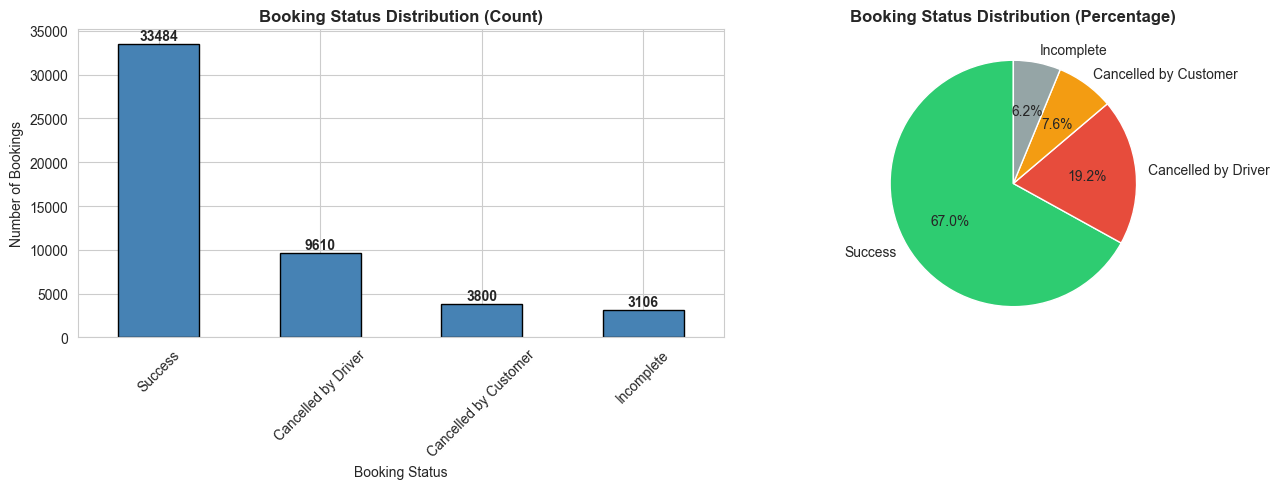


📊 KEY INSIGHT: Success Rate = 66.97%


In [134]:
# ANALYSIS 4.1: Booking Status Distribution
print("="*80)
print("4.1: BOOKING STATUS DISTRIBUTION")
print("="*80)

booking_status = df_clean['Booking Status'].value_counts()
booking_status_pct = df_clean['Booking Status'].value_counts(normalize=True) * 100

status_summary = pd.DataFrame({
    'Status': booking_status.index,
    'Count': booking_status.values,
    'Percentage': booking_status_pct.values.round(2)
})

print(status_summary.to_string(index=False))

# Visualize booking status
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
booking_status.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Booking Status Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Booking Status')
axes[0].set_ylabel('Number of Bookings')
axes[0].tick_params(axis='x', rotation=45)
# Add count labels on bars
for i, v in enumerate(booking_status.values):
    axes[0].text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c', '#f39c12', '#95a5a6']
axes[1].pie(booking_status.values, labels=booking_status.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 10})
axes[1].set_title('Booking Status Distribution (Percentage)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate success rate
success_rate = (booking_status['Success'] / len(df_clean) * 100)
print(f"\n📊 KEY INSIGHT: Success Rate = {success_rate:.2f}%")


4.2: VEHICLE TYPE DISTRIBUTION
Vehicle Type  Count  Percentage
  Prime Plus   7252       14.50
        Bike   7223       14.45
 Prime Sedan   7180       14.36
   Prime SUV   7140       14.28
        Auto   7098       14.20
       eBike   7097       14.19
        Mini   7010       14.02


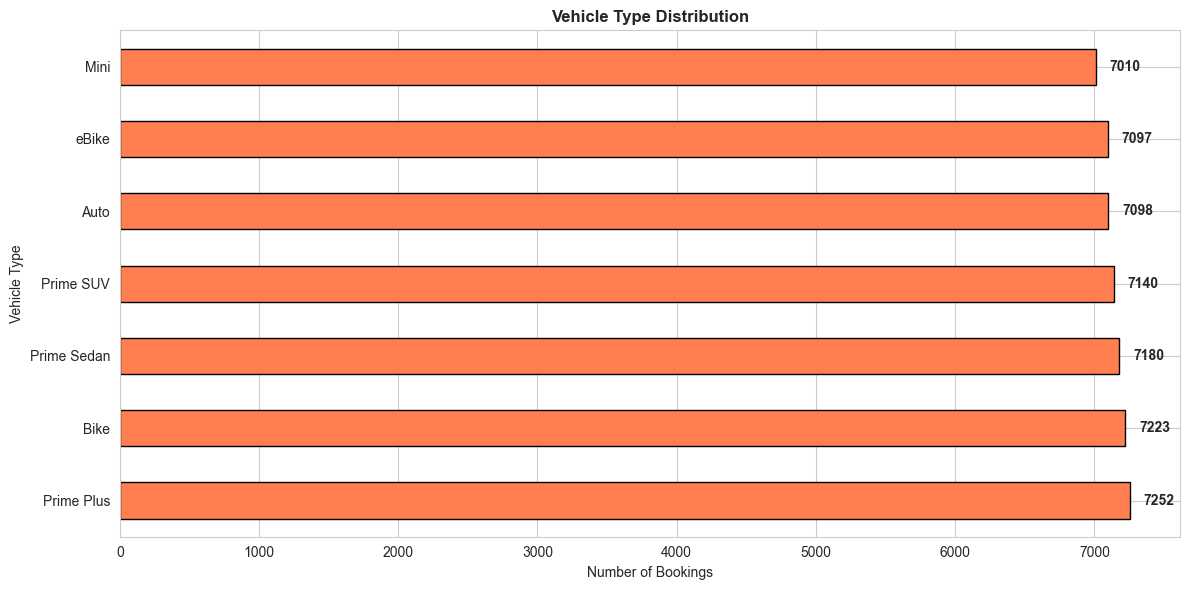


📊 KEY INSIGHT: Most popular vehicle type = Prime Plus (7,252 bookings)


In [135]:
# ANALYSIS 4.2: Vehicle Type Distribution
print("\n" + "="*80)
print("4.2: VEHICLE TYPE DISTRIBUTION")
print("="*80)

vehicle_type = df_clean['Vehicle Type'].value_counts()
vehicle_type_pct = df_clean['Vehicle Type'].value_counts(normalize=True) * 100

vehicle_summary = pd.DataFrame({
    'Vehicle Type': vehicle_type.index,
    'Count': vehicle_type.values,
    'Percentage': vehicle_type_pct.values.round(2)
})

print(vehicle_summary.to_string(index=False))

# Visualize vehicle types
fig, ax = plt.subplots(figsize=(12, 6))
vehicle_type.plot(kind='barh', ax=ax, color='coral', edgecolor='black')
ax.set_title('Vehicle Type Distribution', fontsize=12, fontweight='bold')
ax.set_xlabel('Number of Bookings')
ax.set_ylabel('Vehicle Type')
# Add count labels
for i, v in enumerate(vehicle_type.values):
    ax.text(v + 100, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n📊 KEY INSIGHT: Most popular vehicle type = {vehicle_type.index[0]} ({vehicle_type.iloc[0]:,} bookings)")


4.3: PAYMENT METHOD DISTRIBUTION (Successful Bookings Only)
Payment Method  Count  Percentage
          Cash   8552       25.54
           UPI   8428       25.17
          Card   8280       24.73
        Wallet   8224       24.56


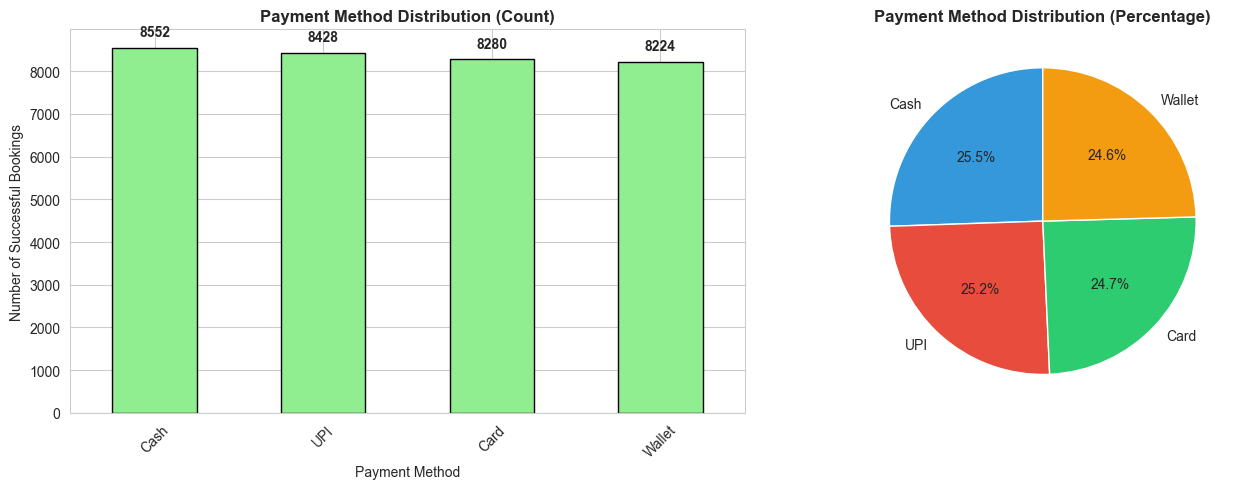


📊 KEY INSIGHT: Most preferred payment method = Cash (25.5%)


In [136]:
# ANALYSIS 4.3: Payment Method Distribution
print("\n" + "="*80)
print("4.3: PAYMENT METHOD DISTRIBUTION (Successful Bookings Only)")
print("="*80)

# Payment methods are only recorded for successful rides
payment_method = df_clean[df_clean['Booking Status'] == 'Success']['Payment Method'].value_counts()
payment_pct = df_clean[df_clean['Booking Status'] == 'Success']['Payment Method'].value_counts(normalize=True) * 100

payment_summary = pd.DataFrame({
    'Payment Method': payment_method.index,
    'Count': payment_method.values,
    'Percentage': payment_pct.values.round(2)
})

print(payment_summary.to_string(index=False))

# Visualize payment methods
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

payment_method.plot(kind='bar', ax=axes[0], color='lightgreen', edgecolor='black')
axes[0].set_title('Payment Method Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Payment Method')
axes[0].set_ylabel('Number of Successful Bookings')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(payment_method.values):
    axes[0].text(i, v + 200, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors_payment = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
axes[1].pie(payment_method.values, labels=payment_method.index, autopct='%1.1f%%',
            colors=colors_payment, startangle=90, textprops={'fontsize': 10})
axes[1].set_title('Payment Method Distribution (Percentage)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 KEY INSIGHT: Most preferred payment method = {payment_method.index[0]} ({payment_pct.iloc[0]:.1f}%)")

In [137]:
# ANALYSIS 4.4: Numeric Distributions for Completed Rides
print("\n" + "="*80)
print("4.4: NUMERIC VARIABLE DISTRIBUTIONS (Successful Rides Only)")
print("="*80)

# Filter for successful bookings only (these have complete metrics)
successful_df = df_clean[df_clean['Booking Status'] == 'Success']

print(f"\nAnalyzing {len(successful_df):,} successful bookings...\n")
print("Descriptive Statistics:")
print(successful_df[['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']].describe().round(2))


4.4: NUMERIC VARIABLE DISTRIBUTIONS (Successful Rides Only)

Analyzing 33,484 successful bookings...

Descriptive Statistics:
       Avg VTAT  Avg CTAT  Booking Value  Ride Distance  Driver Ratings  \
count  33484.00  33484.00       33484.00       33484.00        33484.00   
mean      10.48     15.56        1023.37          25.45            4.00   
std        5.49      8.37         563.60          14.18            0.58   
min        1.00      1.00          50.10           1.00            3.00   
25%        5.73      8.31         532.94          13.10            3.50   
50%       10.46     15.61        1023.35          25.46            4.00   
75%       15.24     22.79        1514.68          37.67            4.50   
max       20.00     30.00        2000.00          50.00            5.00   

       Customer Rating  
count         33484.00  
mean              4.00  
std               0.58  
min               3.00  
25%               3.50  
50%               4.00  
75%               4.50

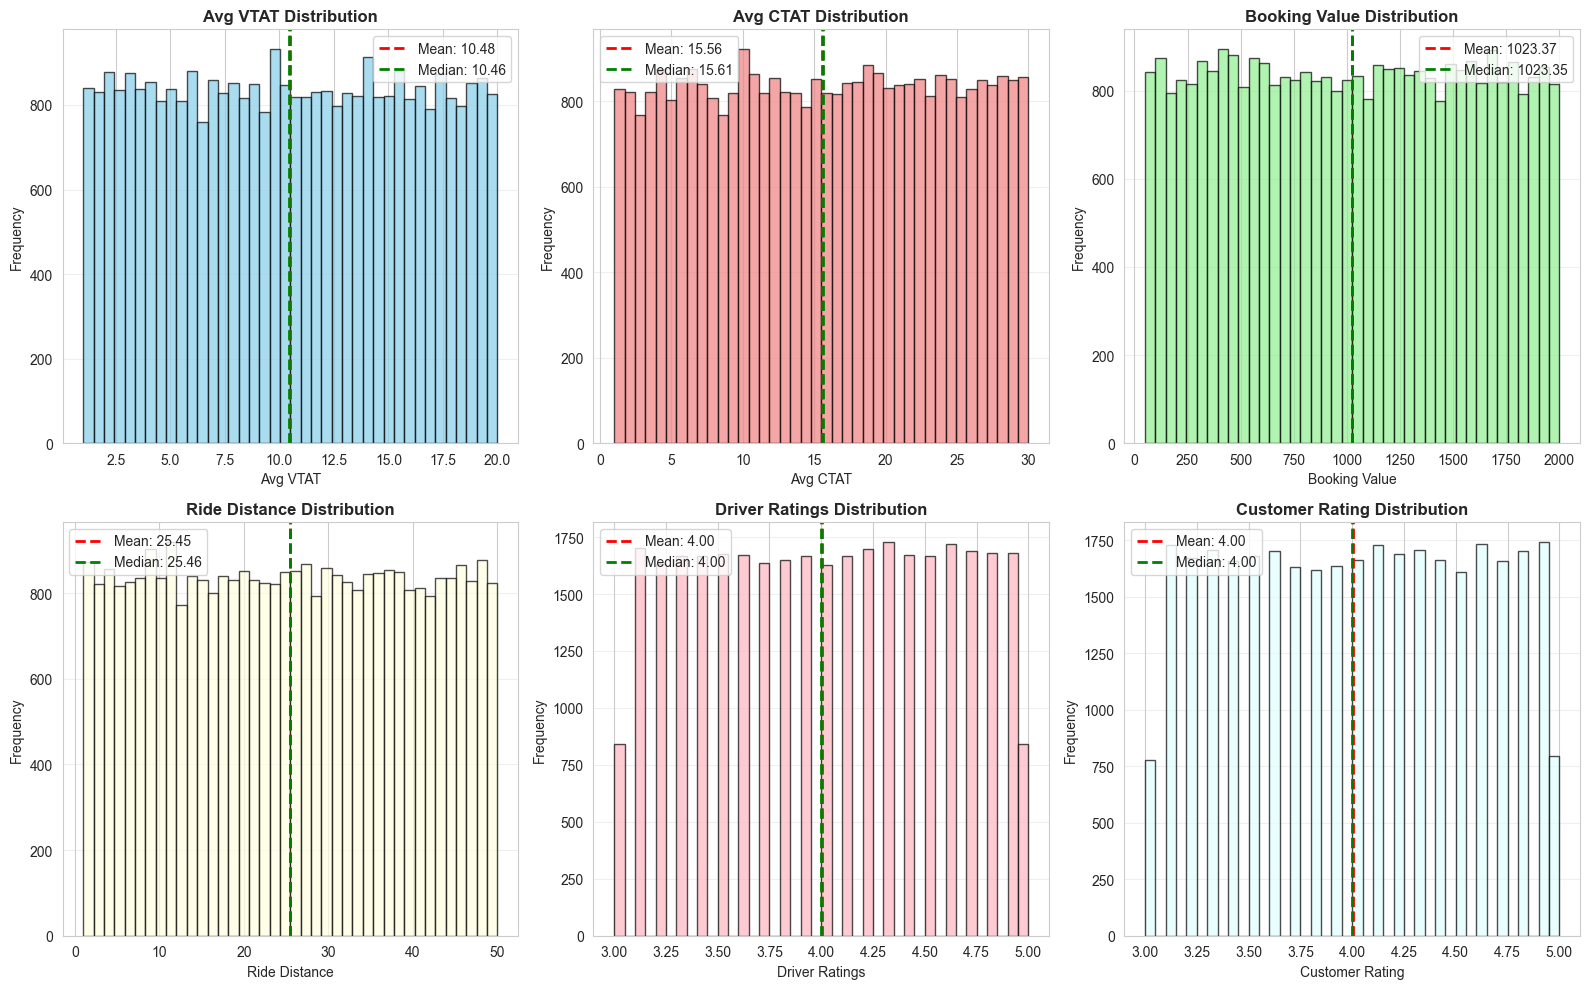

In [138]:
# Create distribution plots for numeric variables
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

# Define the numeric columns and their colors
numeric_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
colors_dist = ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightpink', 'lightcyan']

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(successful_df[col], bins=40, color=colors_dist[idx], edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add statistics annotation
    mean_val = successful_df[col].mean()
    median_val = successful_df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()


4.5: TOP PICKUP AND DROP LOCATIONS

Top 10 Pickup Locations:
 1. Area-39      -  1,100 bookings ( 2.20%)
 2. Area-4       -  1,057 bookings ( 2.11%)
 3. Area-8       -  1,049 bookings ( 2.10%)
 4. Area-29      -  1,045 bookings ( 2.09%)
 5. Area-9       -  1,040 bookings ( 2.08%)
 6. Area-44      -  1,039 bookings ( 2.08%)
 7. Area-11      -  1,038 bookings ( 2.08%)
 8. Area-48      -  1,035 bookings ( 2.07%)
 9. Area-22      -  1,034 bookings ( 2.07%)
10. Area-1       -  1,027 bookings ( 2.05%)

Top 10 Drop Locations:
 1. Area-39      -  1,058 bookings ( 2.12%)
 2. Area-8       -  1,053 bookings ( 2.11%)
 3. Area-21      -  1,049 bookings ( 2.10%)
 4. Area-34      -  1,042 bookings ( 2.08%)
 5. Area-27      -  1,041 bookings ( 2.08%)
 6. Area-47      -  1,036 bookings ( 2.07%)
 7. Area-17      -  1,027 bookings ( 2.05%)
 8. Area-44      -  1,025 bookings ( 2.05%)
 9. Area-37      -  1,025 bookings ( 2.05%)
10. Area-7       -  1,022 bookings ( 2.04%)


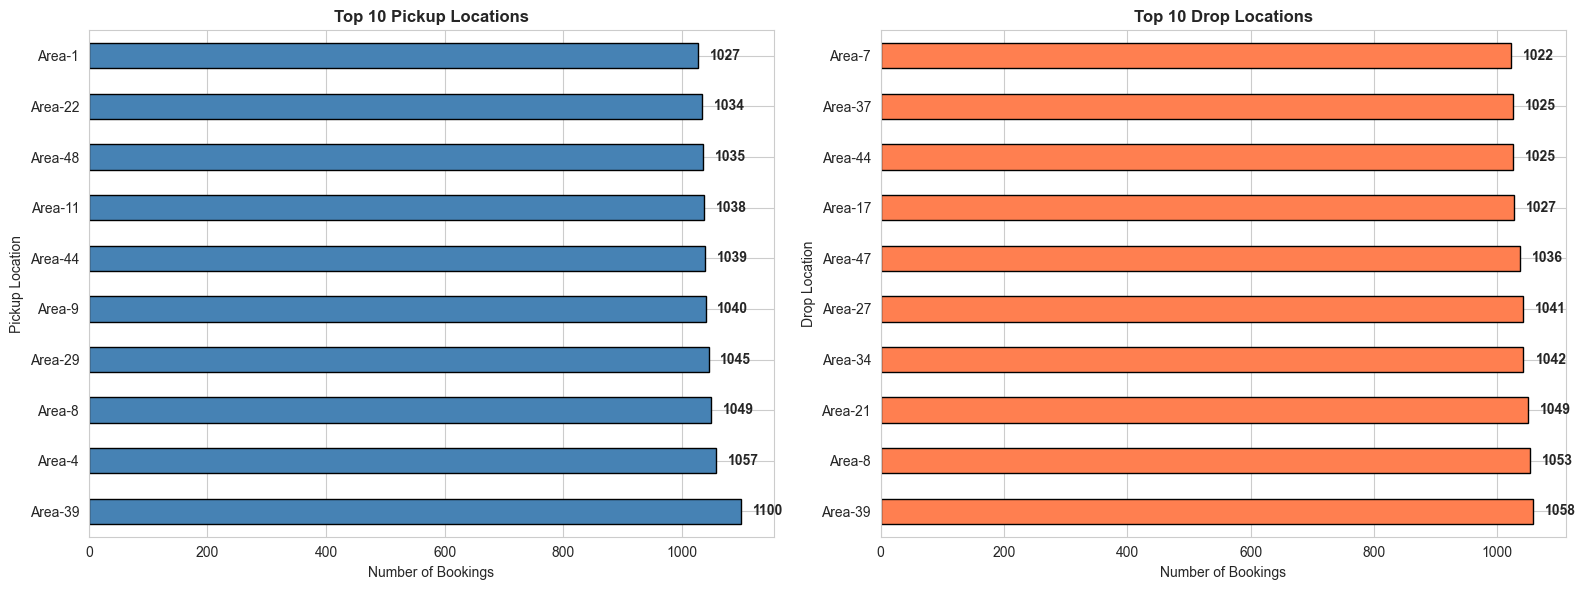


📊 KEY INSIGHT: Most popular pickup area = Area-39 (1,100 bookings)
📊 KEY INSIGHT: Most popular drop area = Area-39 (1,058 bookings)
📊 Geographic reach: 50 unique pickup areas, 50 unique drop areas


In [139]:
# ANALYSIS 4.5: Top Pickup and Drop Locations
print("\n" + "="*80)
print("4.5: TOP PICKUP AND DROP LOCATIONS")
print("="*80)

top_pickup = df_clean['Pickup Location'].value_counts().head(10)
top_drop = df_clean['Drop Location'].value_counts().head(10)

print("\nTop 10 Pickup Locations:")
for i, (loc, count) in enumerate(top_pickup.items(), 1):
    pct = (count / len(df_clean)) * 100
    print(f"{i:2d}. {loc:12s} - {count:6,} bookings ({pct:5.2f}%)")

print("\nTop 10 Drop Locations:")
for i, (loc, count) in enumerate(top_drop.items(), 1):
    pct = (count / len(df_clean)) * 100
    print(f"{i:2d}. {loc:12s} - {count:6,} bookings ({pct:5.2f}%)")

# Visualize top locations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_pickup.plot(kind='barh', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Top 10 Pickup Locations', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Bookings')
for i, v in enumerate(top_pickup.values):
    axes[0].text(v + 20, i, str(v), va='center', fontweight='bold')

top_drop.plot(kind='barh', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Top 10 Drop Locations', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Bookings')
for i, v in enumerate(top_drop.values):
    axes[1].text(v + 20, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 KEY INSIGHT: Most popular pickup area = {top_pickup.index[0]} ({top_pickup.iloc[0]:,} bookings)")
print(f"📊 KEY INSIGHT: Most popular drop area = {top_drop.index[0]} ({top_drop.iloc[0]:,} bookings)")
print(f"📊 Geographic reach: {df_clean['Pickup Location'].nunique()} unique pickup areas, {df_clean['Drop Location'].nunique()} unique drop areas")


4.6: DRIVER AND CUSTOMER RATING DISTRIBUTIONS

Driver Ratings (Successful Rides):
count    33484.00
mean         4.00
std          0.58
min          3.00
25%          3.50
50%          4.00
75%          4.50
max          5.00
Name: Driver Ratings, dtype: float64

Customer Ratings (Successful Rides):
count    33484.00
mean         4.00
std          0.58
min          3.00
25%          3.50
50%          4.00
75%          4.50
max          5.00
Name: Customer Rating, dtype: float64


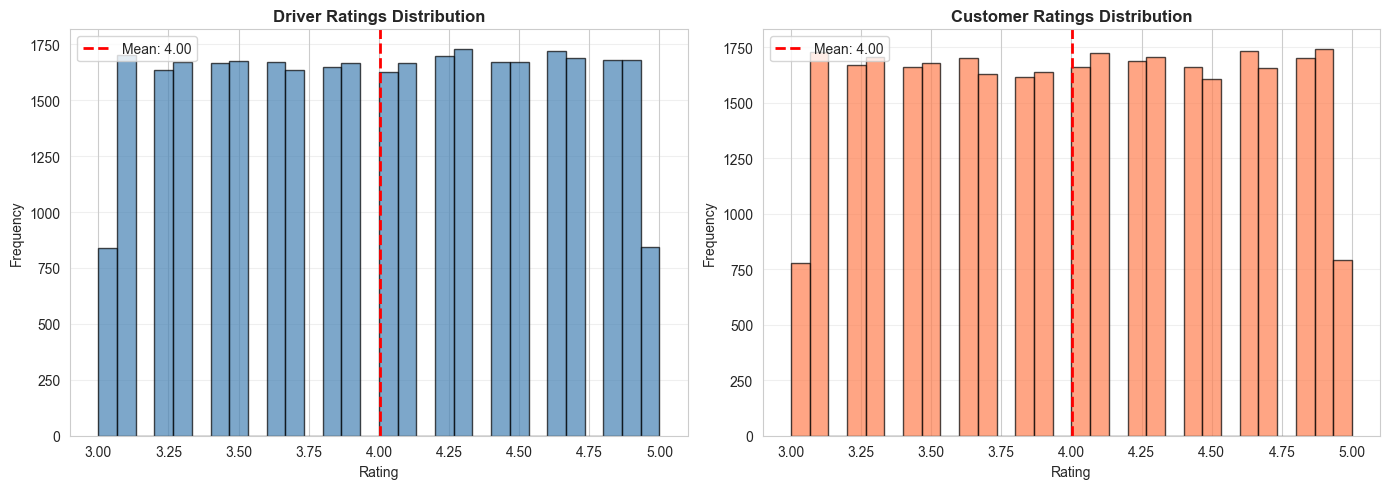


📊 KEY INSIGHT: Avg Driver Rating = 4.00/5.0
📊 KEY INSIGHT: Avg Customer Rating = 4.00/5.0


In [140]:
# ANALYSIS 4.6: Rating Distributions
print("\n" + "="*80)
print("4.6: DRIVER AND CUSTOMER RATING DISTRIBUTIONS")
print("="*80)

print("\nDriver Ratings (Successful Rides):")
print(successful_df['Driver Ratings'].describe().round(2))

print("\nCustomer Ratings (Successful Rides):")
print(successful_df['Customer Rating'].describe().round(2))

# Visualize ratings
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Driver ratings
axes[0].hist(successful_df['Driver Ratings'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Driver Ratings Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')
axes[0].axvline(successful_df['Driver Ratings'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {successful_df["Driver Ratings"].mean():.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Customer ratings
axes[1].hist(successful_df['Customer Rating'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Customer Ratings Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Frequency')
axes[1].axvline(successful_df['Customer Rating'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {successful_df["Customer Rating"].mean():.2f}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 KEY INSIGHT: Avg Driver Rating = {successful_df['Driver Ratings'].mean():.2f}/5.0")
print(f"📊 KEY INSIGHT: Avg Customer Rating = {successful_df['Customer Rating'].mean():.2f}/5.0")

## Section 5: Multivariate Analysis
Explore relationships between multiple variables to uncover patterns and correlations.

5.1: BOOKING VALUE vs RIDE DISTANCE CORRELATION

Pearson Correlation Coefficient: 0.0088
Relationship: Weak positive correlation


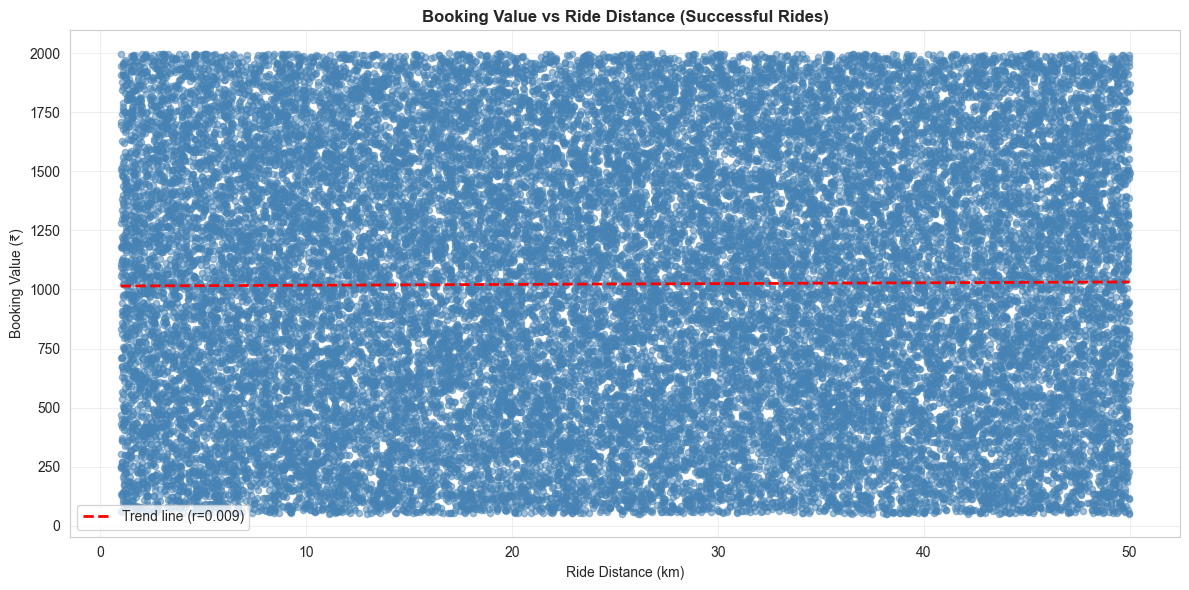


📊 KEY INSIGHT: Distance and price are WEAKLY correlated


In [141]:
# ANALYSIS 5.1: Booking Value vs Ride Distance Correlation
print("="*80)
print("5.1: BOOKING VALUE vs RIDE DISTANCE CORRELATION")
print("="*80)

# Calculate correlation for successful rides
correlation = successful_df['Booking Value'].corr(successful_df['Ride Distance'])
print(f"\nPearson Correlation Coefficient: {correlation:.4f}")
print(f"Relationship: {'Strong' if abs(correlation) > 0.7 else 'Moderate' if abs(correlation) > 0.4 else 'Weak'} positive correlation")

# Visualize the relationship
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(successful_df['Ride Distance'], successful_df['Booking Value'], alpha=0.5, s=20, color='steelblue')

# Add trend line
z = np.polyfit(successful_df['Ride Distance'], successful_df['Booking Value'], 1)
p = np.poly1d(z)
ax.plot(successful_df['Ride Distance'].sort_values(), p(successful_df['Ride Distance'].sort_values()), 
        "r--", linewidth=2, label=f'Trend line (r={correlation:.3f})')

ax.set_title('Booking Value vs Ride Distance (Successful Rides)', fontsize=12, fontweight='bold')
ax.set_xlabel('Ride Distance (km)')
ax.set_ylabel('Booking Value (₹)')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 KEY INSIGHT: Distance and price are {('STRONGLY' if abs(correlation) > 0.7 else 'MODERATELY' if abs(correlation) > 0.4 else 'WEAKLY')} correlated")


5.2: VEHICLE TYPE PERFORMANCE COMPARISON
              Avg Value  Median Value  Count  Avg Distance  Avg VTAT  \
Vehicle Type                                                           
Auto            1017.25       1019.21   4788         25.74     10.43   
Bike            1021.59       1030.32   4853         25.41     10.43   
Mini            1024.17       1012.58   4726         25.58     10.39   
Prime Plus      1021.44       1020.84   4804         25.15     10.45   
Prime SUV       1024.75       1036.10   4767         25.40     10.53   
Prime Sedan     1027.02       1014.94   4790         25.51     10.65   
eBike           1027.48       1032.92   4756         25.34     10.50   

              Avg CTAT  Avg Driver Rating  Avg Customer Rating  
Vehicle Type                                                    
Auto             15.46               4.01                 4.01  
Bike             15.57               4.00                 4.00  
Mini             15.49               4.00        

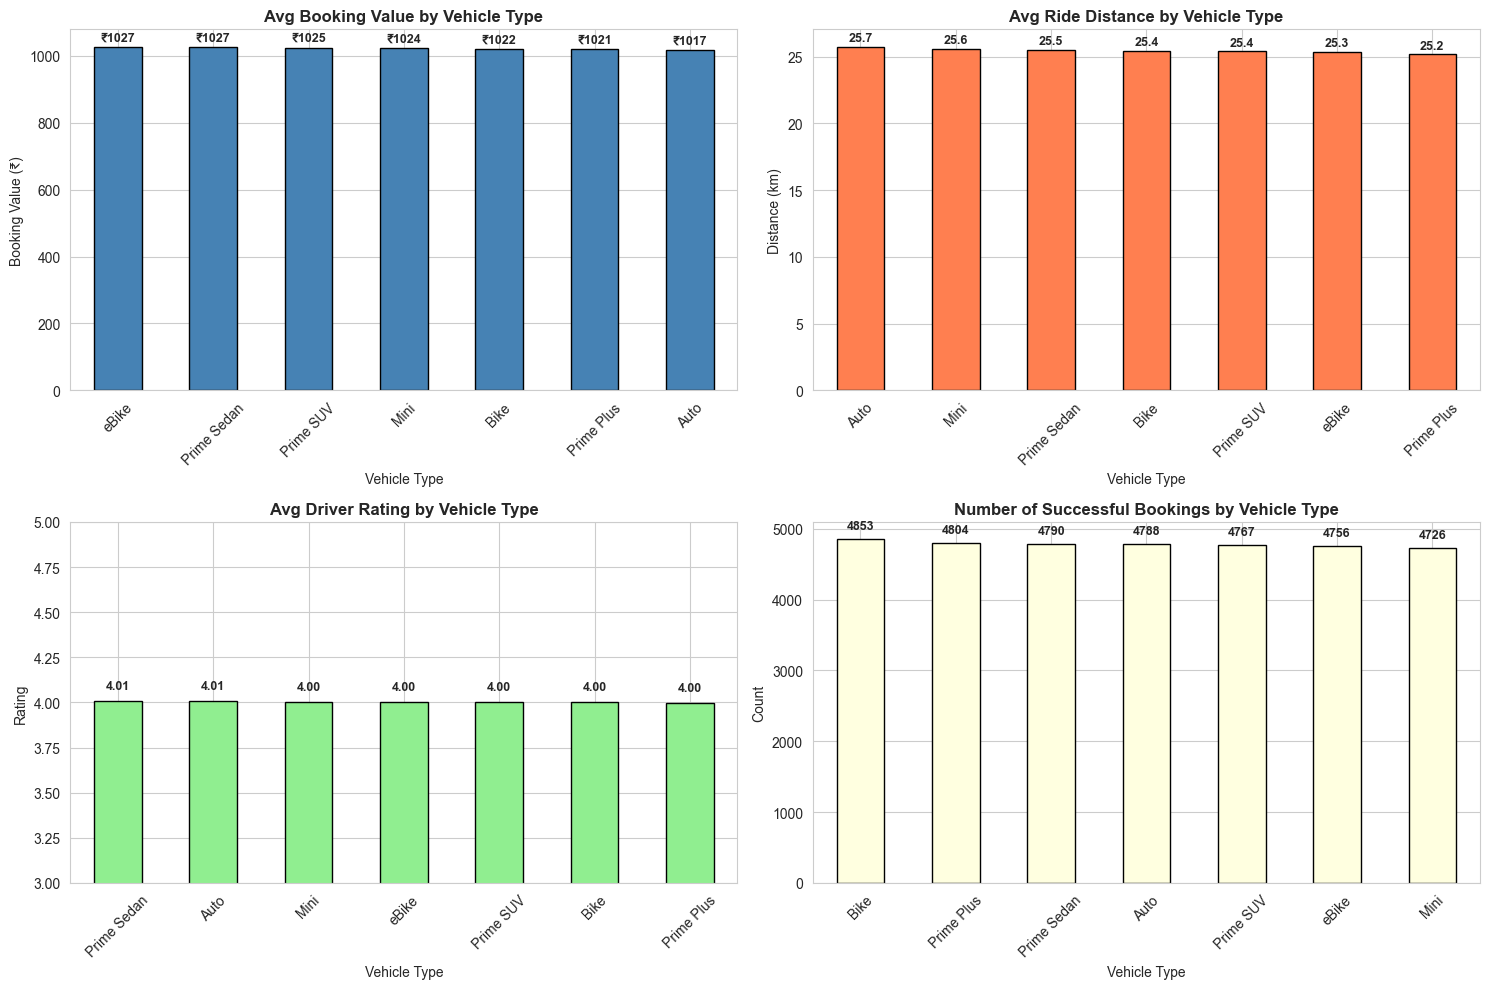


📊 KEY INSIGHT: eBike has highest avg booking value (₹1027)
📊 KEY INSIGHT: Auto covers longest avg distance (25.7 km)
📊 KEY INSIGHT: Prime Sedan has highest driver rating (4.01/5.0)


In [142]:
# ANALYSIS 5.2: Vehicle Type Performance Comparison
print("\n" + "="*80)
print("5.2: VEHICLE TYPE PERFORMANCE COMPARISON")
print("="*80)

# Calculate metrics by vehicle type (for successful rides)
vehicle_performance = successful_df.groupby('Vehicle Type').agg({
    'Booking Value': ['mean', 'median', 'count'],
    'Ride Distance': 'mean',
    'Avg VTAT': 'mean',
    'Avg CTAT': 'mean',
    'Driver Ratings': 'mean',
    'Customer Rating': 'mean'
}).round(2)

vehicle_performance.columns = ['Avg Value', 'Median Value', 'Count', 'Avg Distance', 'Avg VTAT', 'Avg CTAT', 'Avg Driver Rating', 'Avg Customer Rating']
print(vehicle_performance)

# Visualize vehicle type comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Average Booking Value
vehicle_perf_value = successful_df.groupby('Vehicle Type')['Booking Value'].mean().sort_values(ascending=False)
vehicle_perf_value.plot(kind='bar', ax=axes[0,0], color='steelblue', edgecolor='black')
axes[0,0].set_title('Avg Booking Value by Vehicle Type', fontweight='bold')
axes[0,0].set_ylabel('Booking Value (₹)')
axes[0,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(vehicle_perf_value.values):
    axes[0,0].text(i, v + 10, f'₹{v:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Average Ride Distance
vehicle_perf_dist = successful_df.groupby('Vehicle Type')['Ride Distance'].mean().sort_values(ascending=False)
vehicle_perf_dist.plot(kind='bar', ax=axes[0,1], color='coral', edgecolor='black')
axes[0,1].set_title('Avg Ride Distance by Vehicle Type', fontweight='bold')
axes[0,1].set_ylabel('Distance (km)')
axes[0,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(vehicle_perf_dist.values):
    axes[0,1].text(i, v + 0.2, f'{v:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Average Driver Rating
vehicle_perf_driver = successful_df.groupby('Vehicle Type')['Driver Ratings'].mean().sort_values(ascending=False)
vehicle_perf_driver.plot(kind='bar', ax=axes[1,0], color='lightgreen', edgecolor='black')
axes[1,0].set_title('Avg Driver Rating by Vehicle Type', fontweight='bold')
axes[1,0].set_ylabel('Rating')
axes[1,0].set_ylim([3, 5])
axes[1,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(vehicle_perf_driver.values):
    axes[1,0].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Number of Successful Bookings
vehicle_count = successful_df['Vehicle Type'].value_counts()
vehicle_count.plot(kind='bar', ax=axes[1,1], color='lightyellow', edgecolor='black')
axes[1,1].set_title('Number of Successful Bookings by Vehicle Type', fontweight='bold')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(vehicle_count.values):
    axes[1,1].text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n📊 KEY INSIGHT: {vehicle_perf_value.index[0]} has highest avg booking value (₹{vehicle_perf_value.iloc[0]:.0f})")
print(f"📊 KEY INSIGHT: {vehicle_perf_dist.index[0]} covers longest avg distance ({vehicle_perf_dist.iloc[0]:.1f} km)")
print(f"📊 KEY INSIGHT: {vehicle_perf_driver.index[0]} has highest driver rating ({vehicle_perf_driver.iloc[0]:.2f}/5.0)")

In [143]:
# ANALYSIS 5.3: Cancellation Rate by Vehicle Type
print("\n" + "="*80)
print("5.3: CANCELLATION RATE BY VEHICLE TYPE")
print("="*80)

# Calculate cancellation rate for each vehicle type
cancellation_by_vehicle = pd.crosstab(df_clean['Vehicle Type'], df_clean['Booking Status'], margins=True)
print("\nBooking Status by Vehicle Type:")
print(cancellation_by_vehicle)

# Calculate cancellation rates - iterate directly through unique vehicles
print("\nSuccess/Cancellation Rates by Vehicle Type:")
for vehicle in df_clean['Vehicle Type'].unique():
    vehicle_data = df_clean[df_clean['Vehicle Type'] == vehicle]['Booking Status']
    total = len(vehicle_data)
    success = (vehicle_data == 'Success').sum()
    success_rate = (success / total * 100)
    cancellation_rate = ((total - success) / total * 100)
    
    print(f"\n{vehicle}:")
    print(f"  Total Bookings: {total:,}")
    print(f"  Successful: {success:,}")
    print(f"  Success Rate: {success_rate:.1f}%")
    print(f"  Cancellation Rate: {cancellation_rate:.1f}%")


5.3: CANCELLATION RATE BY VEHICLE TYPE

Booking Status by Vehicle Type:
Booking Status  Cancelled by Customer  Cancelled by Driver  Incomplete  \
Vehicle Type                                                             
Auto                              518                 1338         454   
Bike                              561                 1394         415   
Mini                              550                 1318         416   
Prime Plus                        571                 1415         462   
Prime SUV                         529                 1395         449   
Prime Sedan                       532                 1406         452   
eBike                             539                 1344         458   
All                              3800                 9610        3106   

Booking Status  Success    All  
Vehicle Type                    
Auto               4788   7098  
Bike               4853   7223  
Mini               4726   7010  
Prime Plus         48

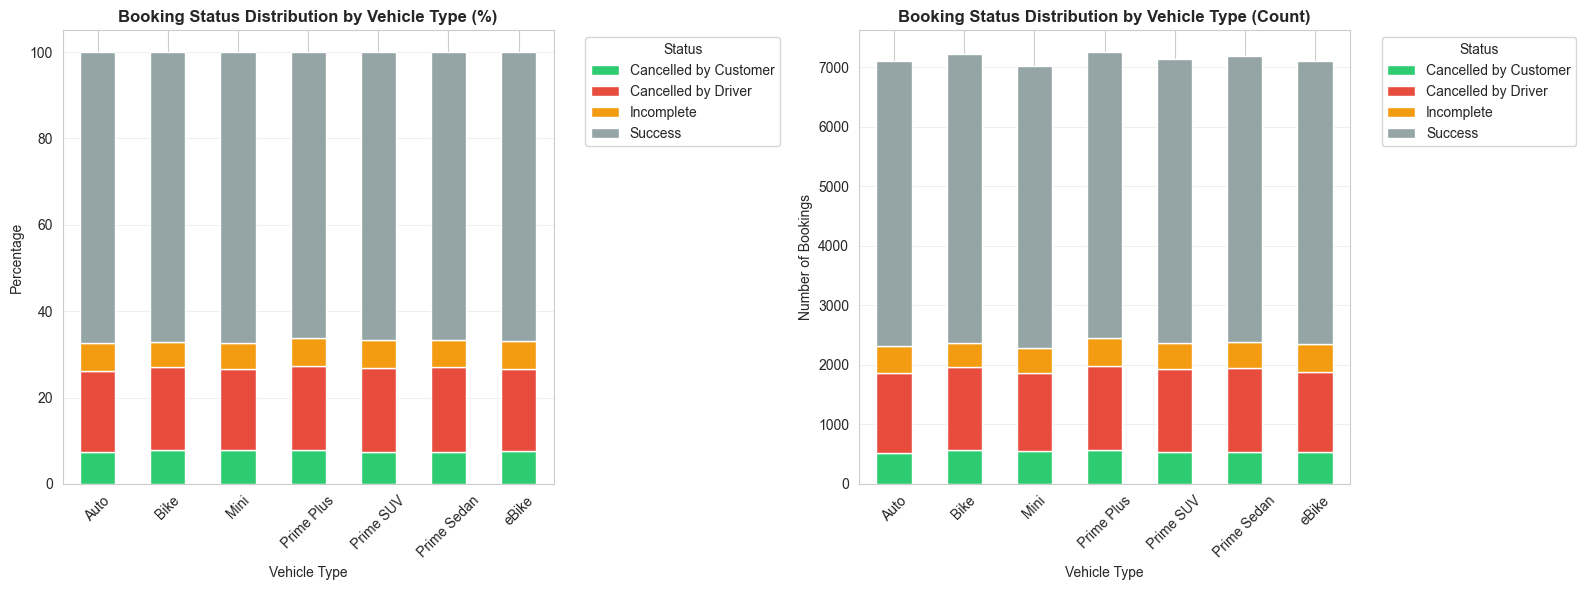

In [144]:
# Visualize cancellation rates by vehicle type
# Prepare data for stacked bar chart
vehicle_status = pd.crosstab(df_clean['Vehicle Type'], df_clean['Booking Status'], normalize='index') * 100
vehicle_status_counts = pd.crosstab(df_clean['Vehicle Type'], df_clean['Booking Status'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked percentage bar chart
vehicle_status.plot(kind='bar', stacked=True, ax=axes[0], 
                    color=['#2ecc71', '#e74c3c', '#f39c12', '#95a5a6'])
axes[0].set_title('Booking Status Distribution by Vehicle Type (%)', fontweight='bold')
axes[0].set_xlabel('Vehicle Type')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Stacked count bar chart
vehicle_status_counts.plot(kind='bar', stacked=True, ax=axes[1],
                           color=['#2ecc71', '#e74c3c', '#f39c12', '#95a5a6'])
axes[1].set_title('Booking Status Distribution by Vehicle Type (Count)', fontweight='bold')
axes[1].set_xlabel('Vehicle Type')
axes[1].set_ylabel('Number of Bookings')
axes[1].legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


5.4: BOOKING VALUE BY PAYMENT METHOD
                Avg Value  Median Value  Count  Total Revenue  Avg Distance  \
Payment Method                                                                
Card              1011.79       1006.79   8280     8377636.12         25.29   
Cash              1025.28       1019.94   8552     8768182.53         25.48   
UPI               1021.86       1027.74   8428     8612263.14         25.58   
Wallet            1034.60       1041.46   8224     8508582.80         25.44   

                Avg Driver Rating  Avg Customer Rating  
Payment Method                                          
Card                         4.01                 4.01  
Cash                         4.00                 3.99  
UPI                          4.00                 4.00  
Wallet                       4.01                 4.00  


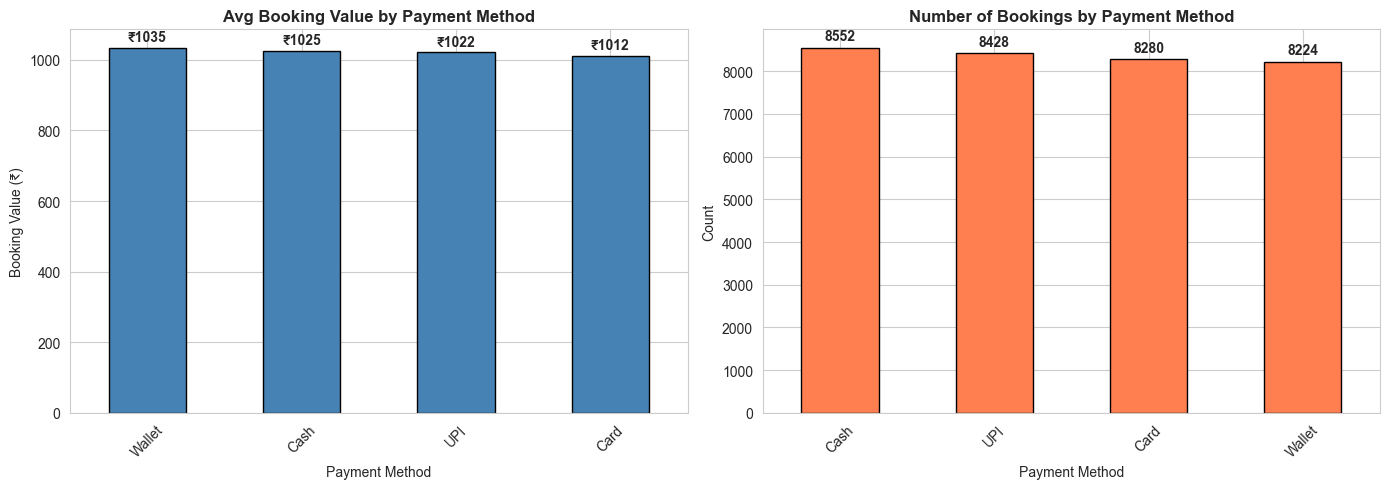


📊 KEY INSIGHT: Wallet has highest avg booking value (₹1035)
📊 KEY INSIGHT: Cash is most popular payment method (8,552 bookings)


In [145]:
# ANALYSIS 5.4: Payment Method Impact on Completion
print("\n" + "="*80)
print("5.4: BOOKING VALUE BY PAYMENT METHOD")
print("="*80)

payment_analysis = successful_df.groupby('Payment Method').agg({
    'Booking Value': ['mean', 'median', 'count', 'sum'],
    'Ride Distance': 'mean',
    'Driver Ratings': 'mean',
    'Customer Rating': 'mean'
}).round(2)

payment_analysis.columns = ['Avg Value', 'Median Value', 'Count', 'Total Revenue', 'Avg Distance', 'Avg Driver Rating', 'Avg Customer Rating']
print(payment_analysis)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Average booking value by payment method
payment_value = successful_df.groupby('Payment Method')['Booking Value'].mean().sort_values(ascending=False)
payment_value.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Avg Booking Value by Payment Method', fontweight='bold')
axes[0].set_ylabel('Booking Value (₹)')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(payment_value.values):
    axes[0].text(i, v + 10, f'₹{v:.0f}', ha='center', va='bottom', fontweight='bold')

# Count of bookings by payment method
payment_count = successful_df['Payment Method'].value_counts()
payment_count.plot(kind='bar', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Number of Bookings by Payment Method', fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(payment_count.values):
    axes[1].text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 KEY INSIGHT: {payment_value.index[0]} has highest avg booking value (₹{payment_value.iloc[0]:.0f})")
print(f"📊 KEY INSIGHT: {payment_count.index[0]} is most popular payment method ({payment_count.iloc[0]:,} bookings)")


5.5: CORRELATION MATRIX OF NUMERIC VARIABLES

Correlation Matrix:
                 Avg VTAT  Avg CTAT  Booking Value  Ride Distance  \
Avg VTAT            1.000     0.003         -0.004          0.001   
Avg CTAT            0.003     1.000          0.002         -0.008   
Booking Value      -0.004     0.002          1.000          0.009   
Ride Distance       0.001    -0.008          0.009          1.000   
Driver Ratings     -0.001    -0.004         -0.001          0.000   
Customer Rating    -0.001    -0.000         -0.013         -0.001   

                 Driver Ratings  Customer Rating  
Avg VTAT                 -0.001           -0.001  
Avg CTAT                 -0.004           -0.000  
Booking Value            -0.001           -0.013  
Ride Distance             0.000           -0.001  
Driver Ratings            1.000           -0.003  
Customer Rating          -0.003            1.000  


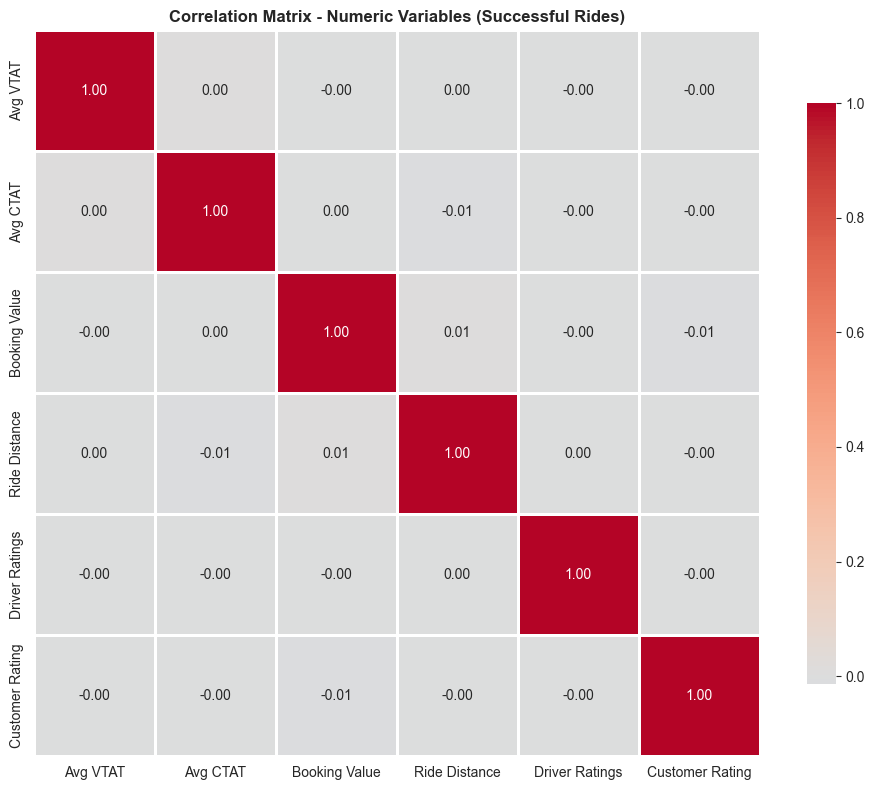


📊 KEY CORRELATIONS:
  Booking Value ↔ Customer Rating: -0.013
  Booking Value ↔ Ride Distance: +0.009
  Avg CTAT ↔ Ride Distance: -0.008
  Avg VTAT ↔ Booking Value: -0.004
  Avg CTAT ↔ Driver Ratings: -0.004


In [146]:
# ANALYSIS 5.5: Correlation Matrix of Numeric Variables
print("\n" + "="*80)
print("5.5: CORRELATION MATRIX OF NUMERIC VARIABLES")
print("="*80)

numeric_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
correlation_matrix = successful_df[numeric_cols].corr().round(3)

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix as heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix - Numeric Variables (Successful Rides)', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

# Identify strongest correlations
print("\n📊 KEY CORRELATIONS:")
# Get upper triangle to avoid duplicates
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append((
            correlation_matrix.columns[i],
            correlation_matrix.columns[j],
            correlation_matrix.iloc[i, j]
        ))

corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in corr_pairs[:5]:
    print(f"  {var1} ↔ {var2}: {corr:+.3f}")

## Section 6: Temporal & Geographic Analysis
Analyze patterns across time and geographic locations to identify trends.

6.1: HOURLY BOOKING DISTRIBUTION

Bookings by Hour of Day:
00:00 | 2,171 bookings ( 4.34%) █████████████████████
01:00 | 2,068 bookings ( 4.14%) ████████████████████
02:00 | 2,140 bookings ( 4.28%) █████████████████████
03:00 | 2,090 bookings ( 4.18%) ████████████████████
04:00 | 2,078 bookings ( 4.16%) ████████████████████
05:00 | 1,995 bookings ( 3.99%) ███████████████████
06:00 | 2,079 bookings ( 4.16%) ████████████████████
07:00 | 2,087 bookings ( 4.17%) ████████████████████
08:00 | 2,049 bookings ( 4.10%) ████████████████████
09:00 | 2,077 bookings ( 4.15%) ████████████████████
10:00 | 2,081 bookings ( 4.16%) ████████████████████
11:00 | 2,020 bookings ( 4.04%) ████████████████████
12:00 | 2,164 bookings ( 4.33%) █████████████████████
13:00 | 2,105 bookings ( 4.21%) █████████████████████
14:00 | 2,005 bookings ( 4.01%) ████████████████████
15:00 | 2,172 bookings ( 4.34%) █████████████████████
16:00 | 2,082 bookings ( 4.16%) ████████████████████
17:00 | 2,132 bookings ( 4.26%) ████

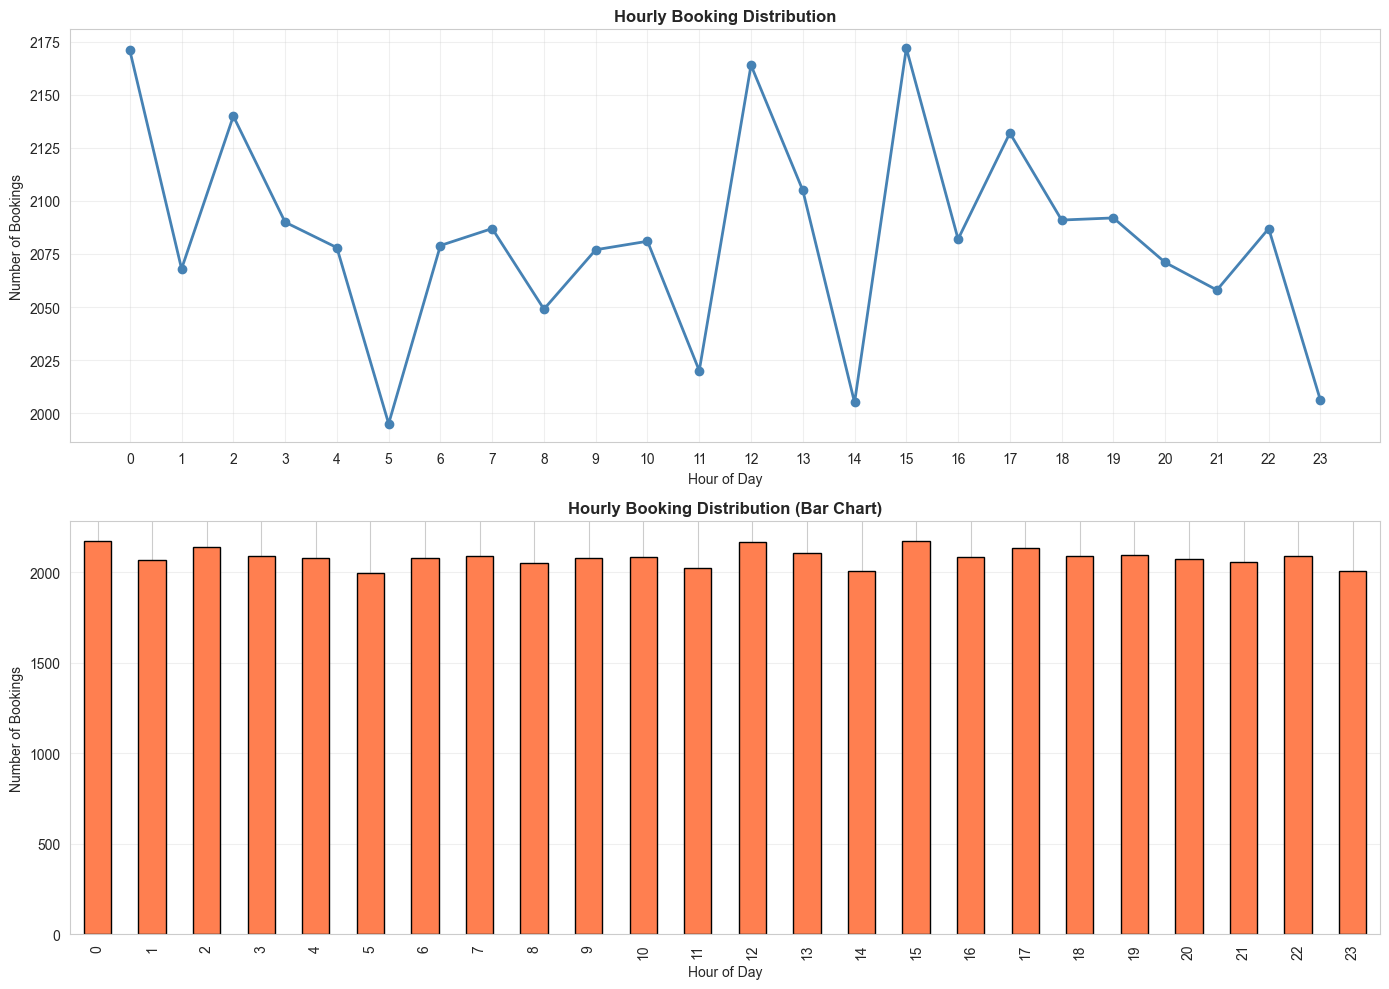


📊 KEY INSIGHT: Peak booking hour = 15:00 (2,172 bookings)
📊 KEY INSIGHT: Off-peak hour = 05:00 (1,995 bookings)


In [147]:
# ANALYSIS 6.1: Hourly Distribution
print("="*80)
print("6.1: HOURLY BOOKING DISTRIBUTION")
print("="*80)

# Extract hour from time column
df_clean['Hour'] = pd.to_datetime(df_clean['Time'], format='%H:%M:%S').dt.hour

hourly_bookings = df_clean['Hour'].value_counts().sort_index()
print("\nBookings by Hour of Day:")
for hour in range(24):
    if hour in hourly_bookings.index:
        count = hourly_bookings[hour]
        pct = (count / len(df_clean)) * 100
        bar_length = int(count / 100)  # Scale for display
        print(f"{hour:02d}:00 | {count:5,} bookings ({pct:5.2f}%) {'█' * bar_length}")

# Visualize hourly distribution
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Line plot
axes[0].plot(hourly_bookings.index, hourly_bookings.values, marker='o', linewidth=2, markersize=6, color='steelblue')
axes[0].set_title('Hourly Booking Distribution', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Bookings')
axes[0].grid(alpha=0.3)
axes[0].set_xticks(range(0, 24))

# Bar plot
hourly_bookings.plot(kind='bar', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Hourly Booking Distribution (Bar Chart)', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Number of Bookings')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Identify peak and off-peak hours
peak_hour = hourly_bookings.idxmax()
off_peak_hour = hourly_bookings.idxmin()
print(f"\n📊 KEY INSIGHT: Peak booking hour = {peak_hour:02d}:00 ({hourly_bookings[peak_hour]:,} bookings)")
print(f"📊 KEY INSIGHT: Off-peak hour = {off_peak_hour:02d}:00 ({hourly_bookings[off_peak_hour]:,} bookings)")


6.2: DAILY BOOKING TREND

Daily bookings range: 66 to 1766
Average daily bookings: 1613


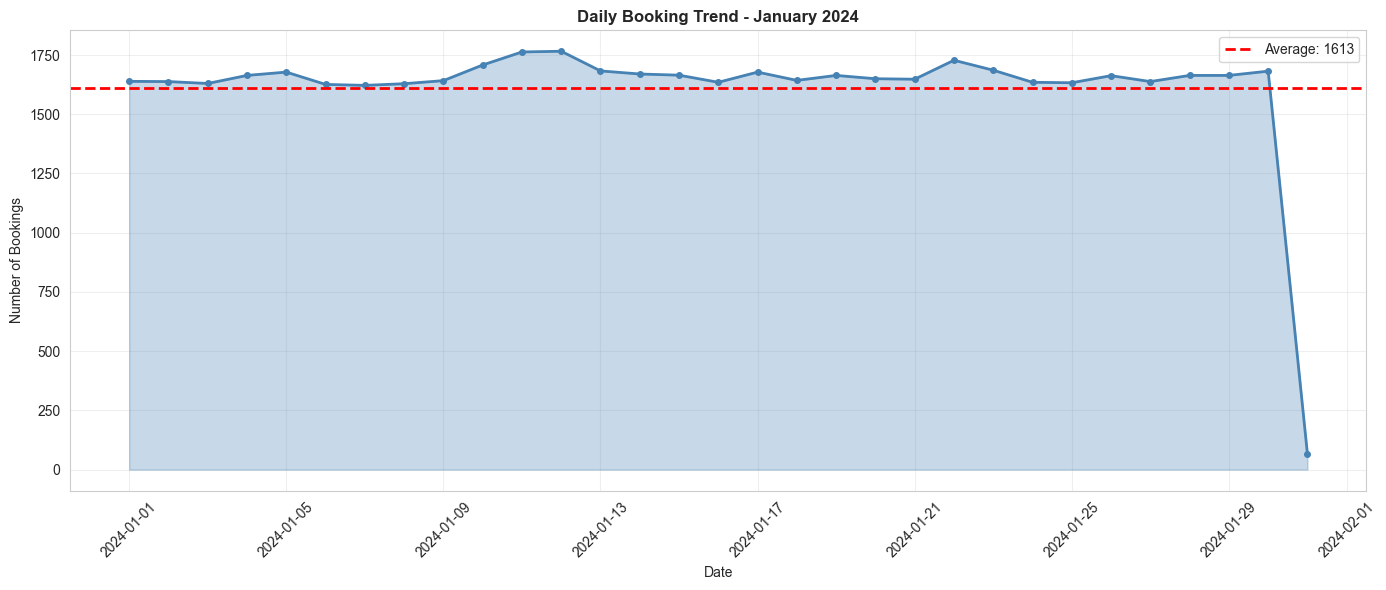


📊 KEY INSIGHT: Highest daily bookings = 1766 on 2024-01-12
📊 KEY INSIGHT: Lowest daily bookings = 66 on 2024-01-31


In [148]:
# ANALYSIS 6.2: Daily Trend
print("\n" + "="*80)
print("6.2: DAILY BOOKING TREND")
print("="*80)

# Convert Date column to datetime if not already
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

daily_bookings = df_clean['Date'].value_counts().sort_index()
print(f"\nDaily bookings range: {daily_bookings.min()} to {daily_bookings.max()}")
print(f"Average daily bookings: {daily_bookings.mean():.0f}")

# Visualize daily trend
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(daily_bookings.index, daily_bookings.values, marker='o', linewidth=2, markersize=4, color='steelblue')
ax.fill_between(daily_bookings.index, daily_bookings.values, alpha=0.3, color='steelblue')
ax.set_title('Daily Booking Trend - January 2024', fontweight='bold', fontsize=12)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Bookings')
ax.axhline(daily_bookings.mean(), color='red', linestyle='--', linewidth=2, label=f'Average: {daily_bookings.mean():.0f}')
ax.grid(alpha=0.3)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n📊 KEY INSIGHT: Highest daily bookings = {daily_bookings.max()} on {daily_bookings.idxmax().date()}")
print(f"📊 KEY INSIGHT: Lowest daily bookings = {daily_bookings.min()} on {daily_bookings.idxmin().date()}")


6.3: TOP ROUTES (PICKUP-DROP LOCATION PAIRS)

Top 15 Most Popular Routes:
2448. Area-8   → Area-7   :    38 bookings ( 0.08%)
1930. Area-44  → Area-36  :    38 bookings ( 0.08%)
2488. Area-9   → Area-43  :    37 bookings ( 0.07%)
903. Area-26  → Area-11  :    34 bookings ( 0.07%)
2410. Area-8   → Area-18  :    34 bookings ( 0.07%)
2180. Area-49  → Area-36  :    34 bookings ( 0.07%)
315. Area-15  → Area-22  :    33 bookings ( 0.07%)
1861. Area-43  → Area-19  :    33 bookings ( 0.07%)
1061. Area-29  → Area-19  :    33 bookings ( 0.07%)
481. Area-18  → Area-37  :    33 bookings ( 0.07%)
883. Area-25  → Area-39  :    33 bookings ( 0.07%)
178. Area-12  → Area-34  :    32 bookings ( 0.06%)
1755. Area-41  → Area-13  :    32 bookings ( 0.06%)
2456. Area-9   → Area-14  :    32 bookings ( 0.06%)
2225. Area-5   → Area-31  :    32 bookings ( 0.06%)


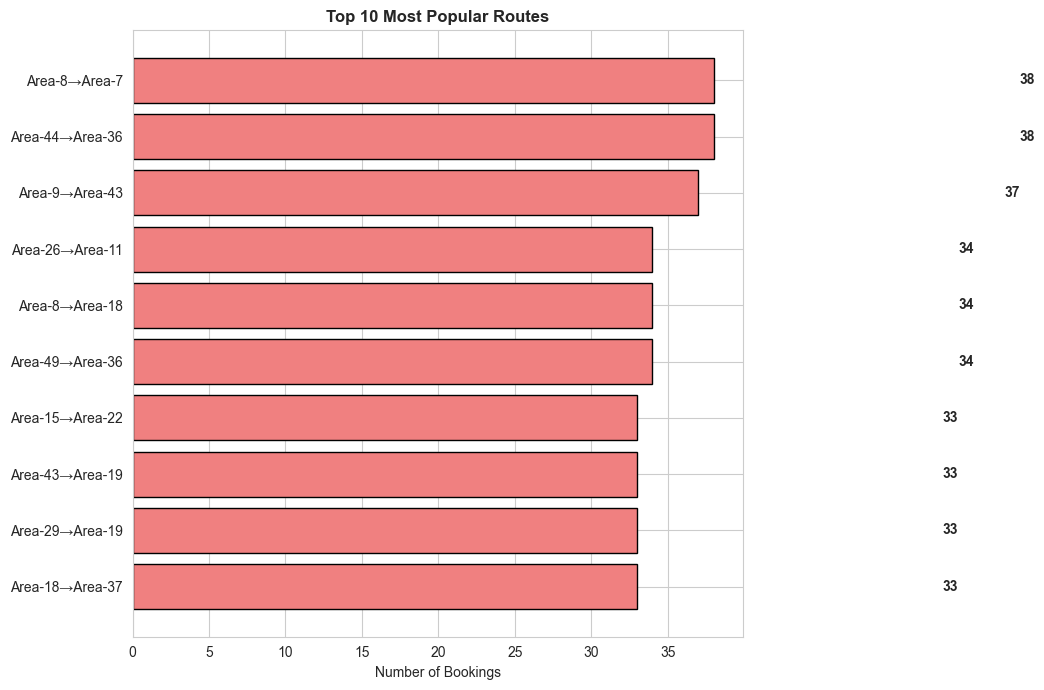


📊 KEY INSIGHT: Most popular route = Area-8 → Area-7 (38 bookings)


In [149]:
# ANALYSIS 6.3: Geographic Heatmap of Top Routes
print("\n" + "="*80)
print("6.3: TOP ROUTES (PICKUP-DROP LOCATION PAIRS)")
print("="*80)

# Identify most common routes
routes = df_clean.groupby(['Pickup Location', 'Drop Location']).size().reset_index(name='Count').sort_values('Count', ascending=False)

print("\nTop 15 Most Popular Routes:")
for i, row in routes.head(15).iterrows():
    pct = (row['Count'] / len(df_clean)) * 100
    print(f"{i+1:2d}. {row['Pickup Location']:8s} → {row['Drop Location']:8s} : {row['Count']:5,} bookings ({pct:5.2f}%)")

# Visualize top routes
top_routes = routes.head(10)
fig, ax = plt.subplots(figsize=(12, 7))
route_labels = [f"{row['Pickup Location']}→{row['Drop Location']}" for _, row in top_routes.iterrows()]
ax.barh(range(len(top_routes)), top_routes['Count'].values, color='lightcoral', edgecolor='black')
ax.set_yticks(range(len(top_routes)))
ax.set_yticklabels(route_labels)
ax.set_title('Top 10 Most Popular Routes', fontweight='bold', fontsize=12)
ax.set_xlabel('Number of Bookings')
ax.invert_yaxis()
for i, v in enumerate(top_routes['Count'].values):
    ax.text(v + 20, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n📊 KEY INSIGHT: Most popular route = {routes.iloc[0]['Pickup Location']} → {routes.iloc[0]['Drop Location']} ({routes.iloc[0]['Count']:,} bookings)")


6.4: PEAK HOURS BY VEHICLE TYPE


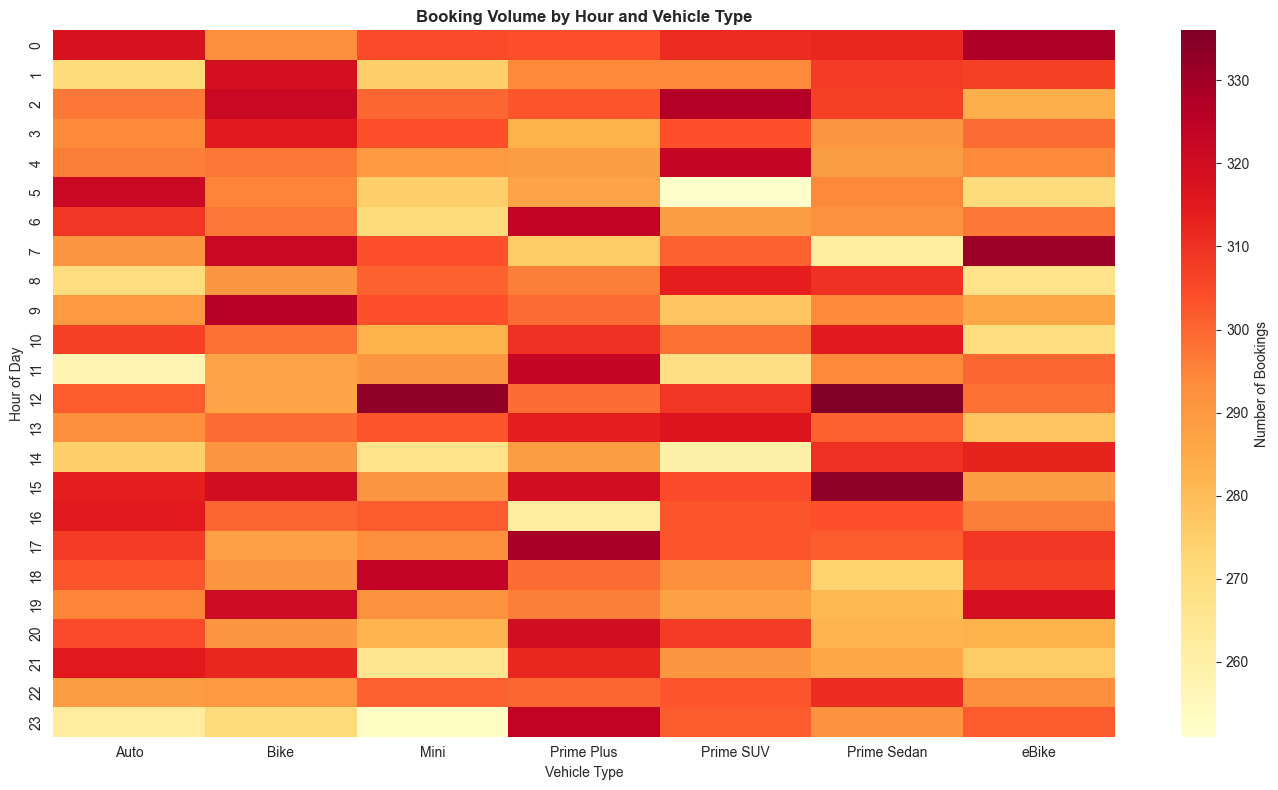


Bookings by Hour and Vehicle Type:
Vehicle Type  Auto  Bike  Mini  Prime Plus  Prime SUV  Prime Sedan  eBike
Hour                                                                     
0              318   293   305         304        311          312    328
1              271   319   275         294        294          308    307
2              297   322   300         303        327          307    284
3              294   315   304         283        304          291    299
4              296   297   290         289        323          289    294
5              322   295   275         287        251          294    271
6              309   297   271         324        289          292    297
7              291   322   304         276        301          262    331
8              270   291   301         296        314          310    267
9              290   326   304         299        278          294    286
10             307   298   283         310        298          315    270
11

In [150]:
# ANALYSIS 6.4: Time-based Pattern - Peak Hours by Vehicle Type
print("\n" + "="*80)
print("6.4: PEAK HOURS BY VEHICLE TYPE")
print("="*80)

# Create heatmap of bookings by hour and vehicle type
vehicle_hour = pd.crosstab(df_clean['Hour'], df_clean['Vehicle Type'])

# Visualize
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(vehicle_hour, cmap='YlOrRd', annot=False, fmt='d', cbar_kws={'label': 'Number of Bookings'}, ax=ax)
ax.set_title('Booking Volume by Hour and Vehicle Type', fontweight='bold', fontsize=12)
ax.set_xlabel('Vehicle Type')
ax.set_ylabel('Hour of Day')
plt.tight_layout()
plt.show()

print("\nBookings by Hour and Vehicle Type:")
print(vehicle_hour)

## Section 7: Cancellation Deep Dive
Detailed analysis of cancellation patterns and reasons.

In [151]:
# ANALYSIS 7.1: Overall Cancellation Rate
print("="*80)
print("7.1: OVERALL CANCELLATION AND COMPLETION RATES")
print("="*80)

status_breakdown = df_clean['Booking Status'].value_counts()

success_count = status_breakdown.get('Success', 0)
cancelled_customer = status_breakdown.get('Cancelled by Customer', 0)
cancelled_driver = status_breakdown.get('Cancelled by Driver', 0)
incomplete = status_breakdown.get('Incomplete', 0)
total = len(df_clean)

print(f"\nTotal Bookings: {total:,}")
print(f"\nSuccessful Rides: {success_count:,} ({success_count/total*100:.1f}%)")
print(f"Cancelled by Customer: {cancelled_customer:,} ({cancelled_customer/total*100:.1f}%)")
print(f"Cancelled by Driver: {cancelled_driver:,} ({cancelled_driver/total*100:.1f}%)")
print(f"Incomplete Rides: {incomplete:,} ({incomplete/total*100:.1f}%)")

total_cancelled = cancelled_customer + cancelled_driver + incomplete
print(f"\nTOTAL CANCELLATION RATE: {total_cancelled/total*100:.1f}% ({total_cancelled:,} rides)")
print(f"SUCCESS RATE: {success_count/total*100:.1f}% ({success_count:,} rides)")

7.1: OVERALL CANCELLATION AND COMPLETION RATES

Total Bookings: 50,000

Successful Rides: 33,484 (67.0%)
Cancelled by Customer: 3,800 (7.6%)
Cancelled by Driver: 9,610 (19.2%)
Incomplete Rides: 3,106 (6.2%)

TOTAL CANCELLATION RATE: 33.0% (16,516 rides)
SUCCESS RATE: 67.0% (33,484 rides)



7.2: CUSTOMER CANCELLATION REASONS

Total Customer Cancellations: 3,800

Top Cancellation Reasons:
    793 ( 20.9%) - Driver is not moving towards pickup location
    792 ( 20.8%) - AC is not working
    757 ( 19.9%) - Change of plans
    738 ( 19.4%) - Driver asked to cancel
    720 ( 18.9%) - Wrong Address


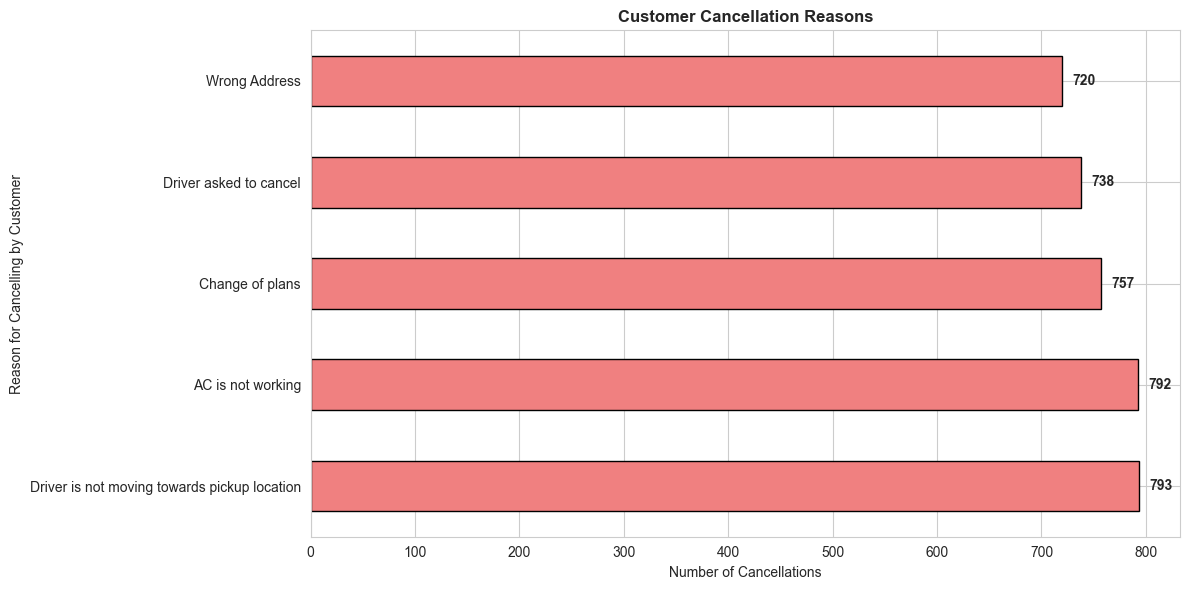

In [152]:
# ANALYSIS 7.2: Cancellation Reasons - Customer
print("\n" + "="*80)
print("7.2: CUSTOMER CANCELLATION REASONS")
print("="*80)

# Get cancellations by customers
customer_cancellations = df_clean[df_clean['Booking Status'] == 'Cancelled by Customer']
customer_cancel_reasons = customer_cancellations['Reason for Cancelling by Customer'].value_counts()

print(f"\nTotal Customer Cancellations: {len(customer_cancellations):,}")
print(f"\nTop Cancellation Reasons:")
for reason, count in customer_cancel_reasons.items():
    pct = (count / len(customer_cancellations)) * 100
    print(f"  {count:5,} ({pct:5.1f}%) - {reason}")

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
customer_cancel_reasons.plot(kind='barh', ax=ax, color='lightcoral', edgecolor='black')
ax.set_title('Customer Cancellation Reasons', fontweight='bold', fontsize=12)
ax.set_xlabel('Number of Cancellations')
for i, v in enumerate(customer_cancel_reasons.values):
    ax.text(v + 10, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()


7.3: DRIVER CANCELLATION REASONS

Total Driver Cancellations: 9,610

Top Cancellation Reasons:
  2,512 ( 26.1%) - More than permitted people in there
  2,413 ( 25.1%) - Personal & Car related issues
  2,402 ( 25.0%) - Customer related issue
  2,283 ( 23.8%) - The customer was coughing/sick


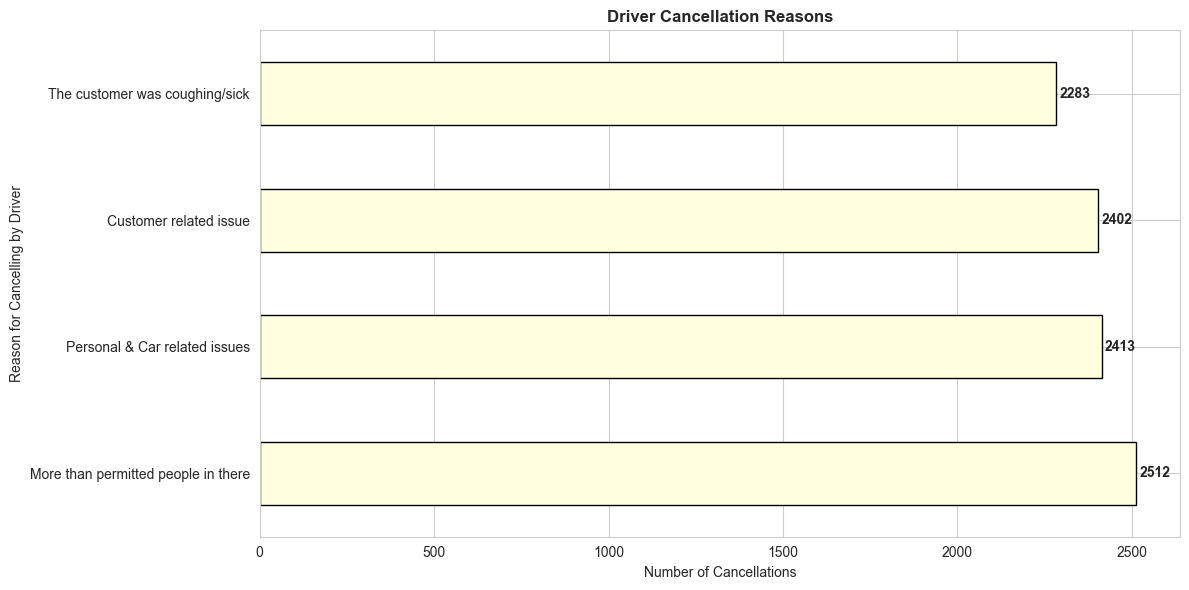

In [153]:
# ANALYSIS 7.3: Cancellation Reasons - Driver
print("\n" + "="*80)
print("7.3: DRIVER CANCELLATION REASONS")
print("="*80)

# Get cancellations by drivers
driver_cancellations = df_clean[df_clean['Booking Status'] == 'Cancelled by Driver']
driver_cancel_reasons = driver_cancellations['Reason for Cancelling by Driver'].value_counts()

print(f"\nTotal Driver Cancellations: {len(driver_cancellations):,}")
print(f"\nTop Cancellation Reasons:")
for reason, count in driver_cancel_reasons.items():
    pct = (count / len(driver_cancellations)) * 100
    print(f"  {count:5,} ({pct:5.1f}%) - {reason}")

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
driver_cancel_reasons.plot(kind='barh', ax=ax, color='lightyellow', edgecolor='black')
ax.set_title('Driver Cancellation Reasons', fontweight='bold', fontsize=12)
ax.set_xlabel('Number of Cancellations')
for i, v in enumerate(driver_cancel_reasons.values):
    ax.text(v + 10, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()


7.4: INCOMPLETE RIDE REASONS

Total Incomplete Rides: 3,106

Incomplete Ride Reasons:
  1,091 ( 35.1%) - Customer Demand
  1,029 ( 33.1%) - Other Issue
    986 ( 31.7%) - Vehicle Breakdown


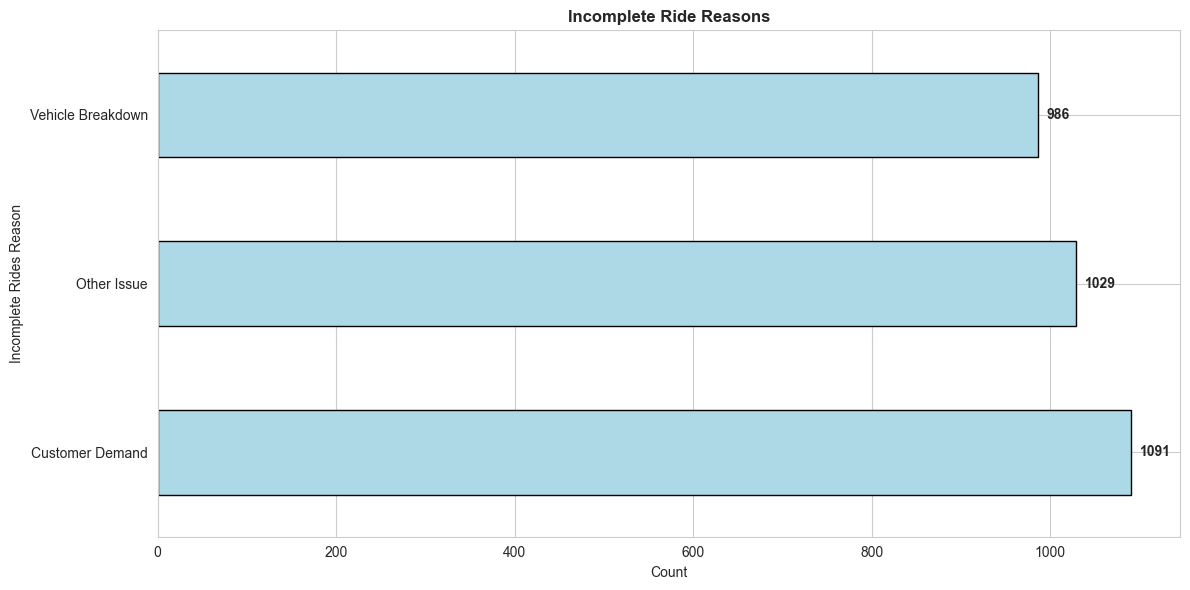

In [154]:
# ANALYSIS 7.4: Incomplete Ride Reasons
print("\n" + "="*80)
print("7.4: INCOMPLETE RIDE REASONS")
print("="*80)

# Get incomplete rides
incomplete_rides = df_clean[df_clean['Booking Status'] == 'Incomplete']
incomplete_reasons = incomplete_rides['Incomplete Rides Reason'].value_counts()

print(f"\nTotal Incomplete Rides: {len(incomplete_rides):,}")
print(f"\nIncomplete Ride Reasons:")
for reason, count in incomplete_reasons.items():
    pct = (count / len(incomplete_rides)) * 100
    print(f"  {count:5,} ({pct:5.1f}%) - {reason}")

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
incomplete_reasons.plot(kind='barh', ax=ax, color='lightblue', edgecolor='black')
ax.set_title('Incomplete Ride Reasons', fontweight='bold', fontsize=12)
ax.set_xlabel('Count')
for i, v in enumerate(incomplete_reasons.values):
    ax.text(v + 10, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()


7.5: FINANCIAL IMPACT OF CANCELLATIONS

Total Revenue from Successful Rides: ₹34,266,665
Average Booking Value: ₹1023.37

Estimated Lost Revenue from Cancellations:
  Customer Cancellations: ₹3,888,822
  Driver Cancellations: ₹9,834,627
  Incomplete Rides: ₹3,178,601
  TOTAL LOST REVENUE: ₹16,902,050


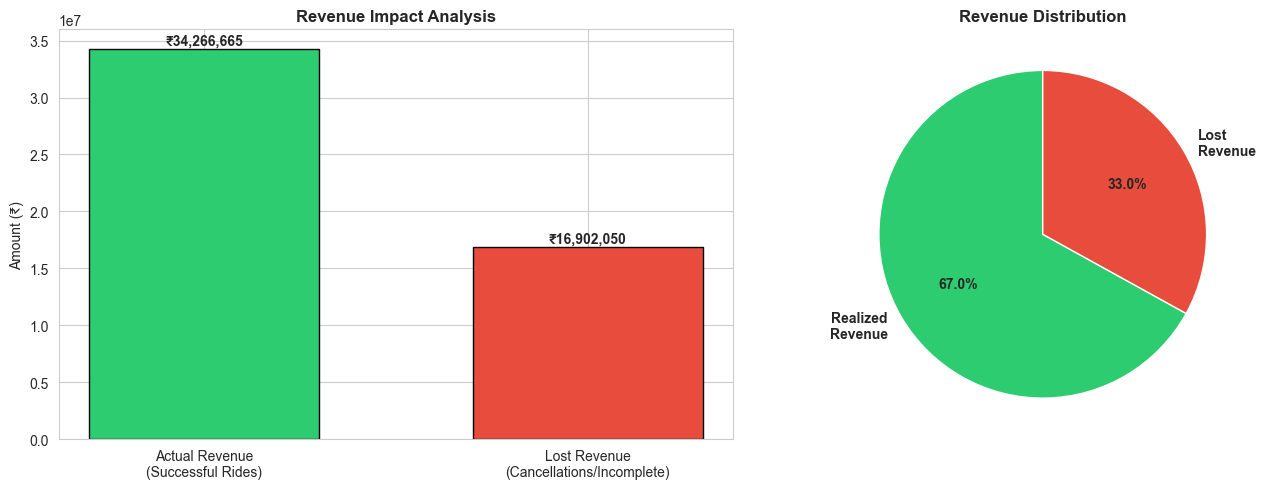


📊 KEY INSIGHT: Revenue loss percentage = 33.0%
📊 KEY INSIGHT: For every ₹100 in potential revenue, ₹33.03 is lost to cancellations


In [155]:
# ANALYSIS 7.5: Revenue Impact of Cancellations
print("\n" + "="*80)
print("7.5: FINANCIAL IMPACT OF CANCELLATIONS")
print("="*80)

# Calculate revenue metrics
total_potential_revenue = successful_df['Booking Value'].sum()
avg_ride_value = successful_df['Booking Value'].mean()
estimated_lost_revenue = (cancelled_customer + cancelled_driver + incomplete) * avg_ride_value

print(f"\nTotal Revenue from Successful Rides: ₹{total_potential_revenue:,.0f}")
print(f"Average Booking Value: ₹{avg_ride_value:.2f}")
print(f"\nEstimated Lost Revenue from Cancellations:")
print(f"  Customer Cancellations: ₹{cancelled_customer * avg_ride_value:,.0f}")
print(f"  Driver Cancellations: ₹{cancelled_driver * avg_ride_value:,.0f}")
print(f"  Incomplete Rides: ₹{incomplete * avg_ride_value:,.0f}")
print(f"  TOTAL LOST REVENUE: ₹{estimated_lost_revenue:,.0f}")

# Revenue visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Revenue comparison
revenue_data = [total_potential_revenue, estimated_lost_revenue]
revenue_labels = ['Actual Revenue\n(Successful Rides)', 'Lost Revenue\n(Cancellations/Incomplete)']
colors_rev = ['#2ecc71', '#e74c3c']
axes[0].bar(revenue_labels, revenue_data, color=colors_rev, edgecolor='black', width=0.6)
axes[0].set_title('Revenue Impact Analysis', fontweight='bold')
axes[0].set_ylabel('Amount (₹)')
for i, v in enumerate(revenue_data):
    axes[0].text(i, v + 100000, f'₹{v:,.0f}', ha='center', va='bottom', fontweight='bold')

# Pie chart of revenue distribution
total_possible_revenue = total_potential_revenue + estimated_lost_revenue
pie_data = [total_potential_revenue, estimated_lost_revenue]
axes[1].pie(pie_data, labels=['Realized\nRevenue', 'Lost\nRevenue'], autopct='%1.1f%%',
            colors=colors_rev, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[1].set_title('Revenue Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

revenue_loss_pct = (estimated_lost_revenue / total_possible_revenue) * 100
print(f"\n📊 KEY INSIGHT: Revenue loss percentage = {revenue_loss_pct:.1f}%")
print(f"📊 KEY INSIGHT: For every ₹100 in potential revenue, ₹{revenue_loss_pct:.2f} is lost to cancellations")

## Section 8: Summary Insights & Business Recommendations
Key findings and actionable insights for business improvement.

In [156]:
print("="*100)
print(" " * 20 + "BENGALURU OLA BOOKING DATA - EXECUTIVE SUMMARY")
print("="*100)

print("\n" + "█"*100)
print("📊 DATASET OVERVIEW")
print("█"*100)
print(f"  • Time Period: January 1-30, 2024")
print(f"  • Total Bookings: {len(df_clean):,}")
print(f"  • Geographic Coverage: {df_clean['Pickup Location'].nunique()} unique pickup areas")
print(f"  • Vehicle Types: {df_clean['Vehicle Type'].nunique()} types available")

print("\n" + "█"*100)
print("📈 KEY PERFORMANCE METRICS")
print("█"*100)
print(f"  • Success Rate: {(success_count/total)*100:.1f}% ({success_count:,} successful rides)")
print(f"  • Cancellation Rate: {(total_cancelled/total)*100:.1f}% ({total_cancelled:,} cancellations)")
print(f"  • Avg Booking Value: ₹{avg_ride_value:.2f}")
print(f"  • Avg Ride Distance: {successful_df['Ride Distance'].mean():.2f} km")
print(f"  • Avg Driver Rating: {successful_df['Driver Ratings'].mean():.2f}/5.0")
print(f"  • Avg Customer Rating: {successful_df['Customer Rating'].mean():.2f}/5.0")
print(f"  • Total Revenue (Realized): ₹{total_potential_revenue:,.0f}")
print(f"  • Revenue Lost (to cancellations): ₹{estimated_lost_revenue:,.0f} ({revenue_loss_pct:.1f}%)")

print("\n" + "█"*100)
print("🚗 VEHICLE PERFORMANCE")
print("█"*100)
print(f"  • Most Popular Vehicle: {vehicle_type.index[0]} ({vehicle_type.iloc[0]:,} bookings)")
print(f"  • Highest Revenue Vehicle: {vehicle_perf_value.index[0]} (₹{vehicle_perf_value.iloc[0]:.0f} avg)")
print(f"  • Longest Avg Distance: {vehicle_perf_dist.index[0]} ({vehicle_perf_dist.iloc[0]:.1f} km)")
print(f"  • Highest Rated: {vehicle_perf_driver.index[0]} ({vehicle_perf_driver.iloc[0]:.2f}/5.0)")

print("\n" + "█"*100)
print("💳 PAYMENT PREFERENCES")
print("█"*100)
print(f"  • Most Popular Method: {payment_count.index[0]} ({(payment_count.iloc[0]/len(successful_df))*100:.1f}% of successful rides)")
print(f"  • Highest Avg Transaction: {payment_value.index[0]} (₹{payment_value.iloc[0]:.0f})")

print("\n" + "█"*100)
print("⏰ TEMPORAL PATTERNS")
print("█"*100)
print(f"  • Peak Hour: {peak_hour:02d}:00 ({hourly_bookings[peak_hour]:,} bookings)")
print(f"  • Off-Peak Hour: {off_peak_hour:02d}:00 ({hourly_bookings[off_peak_hour]:,} bookings)")
print(f"  • Highest Daily Bookings: {daily_bookings.max():,} on {daily_bookings.idxmax().date()}")
print(f"  • Avg Daily Bookings: {daily_bookings.mean():.0f}")

print("\n" + "█"*100)
print("📍 GEOGRAPHIC HOTSPOTS")
print("█"*100)
print(f"  • Most Popular Pickup: {top_pickup.index[0]} ({top_pickup.iloc[0]:,} bookings)")
print(f"  • Most Popular Drop: {top_drop.index[0]} ({top_drop.iloc[0]:,} bookings)")
print(f"  • Top Route: {routes.iloc[0]['Pickup Location']}→{routes.iloc[0]['Drop Location']} ({routes.iloc[0]['Count']:,} rides)")

print("\n" + "█"*100)
print("❌ CANCELLATION ANALYSIS")
print("█"*100)
print(f"  • Customer Cancellations: {cancelled_customer:,} ({(cancelled_customer/total)*100:.1f}%)")
print(f"  • Driver Cancellations: {cancelled_driver:,} ({(cancelled_driver/total)*100:.1f}%)")
print(f"  • Incomplete Rides: {incomplete:,} ({(incomplete/total)*100:.1f}%)")
top_customer_reason = customer_cancel_reasons.index[0] if len(customer_cancel_reasons) > 0 else 'N/A'
top_driver_reason = driver_cancel_reasons.index[0] if len(driver_cancel_reasons) > 0 else 'N/A'
print(f"  • Top Customer Cancellation Reason: {top_customer_reason}")
print(f"  • Top Driver Cancellation Reason: {top_driver_reason}")

print("\n" + "█"*100)
print("🎯 KEY BUSINESS INSIGHTS & RECOMMENDATIONS")
print("█"*100)
print(f"""
1. CANCELLATION CRISIS
   → {total_cancelled:,} rides cancelled ({(total_cancelled/total)*100:.1f}% cancellation rate)
   → Lost revenue potential: ₹{estimated_lost_revenue:,.0f}
   → ACTION: Investigate root causes, implement retention strategies

2. VEHICLE OPTIMIZATION
   → {vehicle_type.index[0]} dominates market ({(vehicle_type.iloc[0]/total)*100:.1f}% of bookings)
   → {vehicle_perf_value.index[0]} generates highest revenue (₹{vehicle_perf_value.iloc[0]:.0f} avg)
   → ACTION: Balance fleet with high-revenue vehicle types, monitor utilization

3. PEAK HOUR MANAGEMENT
   → Peak hour: {peak_hour:02d}:00 ({hourly_bookings[peak_hour]:,} bookings)
   → {(hourly_bookings[peak_hour]/hourly_bookings.mean()):.1f}x average demand
   → ACTION: Surge pricing, increased driver incentives, queue management

4. GEOGRAPHIC EXPANSION
   → {top_pickup.index[0]} heavily concentrated ({(top_pickup.iloc[0]/total)*100:.1f}% of pickups)
   → Opportunity to develop underutilized areas
   → ACTION: Marketing push in low-utilization areas, partnership incentives

5. PAYMENT METHOD STRATEGY
   → {payment_count.index[0]} most popular ({(payment_count.iloc[0]/len(successful_df))*100:.1f}% adoption)
   → {payment_value.index[0]} has highest transaction value
   → ACTION: Incentivize digital payments, ensure payment system reliability

6. QUALITY ASSURANCE
   → Avg Driver Rating: {successful_df['Driver Ratings'].mean():.2f}/5.0
   → Avg Customer Rating: {successful_df['Customer Rating'].mean():.2f}/5.0
   → ACTION: Driver training programs, customer feedback implementation
""")

print("\n" + "="*100)

                    BENGALURU OLA BOOKING DATA - EXECUTIVE SUMMARY

████████████████████████████████████████████████████████████████████████████████████████████████████
📊 DATASET OVERVIEW
████████████████████████████████████████████████████████████████████████████████████████████████████
  • Time Period: January 1-30, 2024
  • Total Bookings: 50,000
  • Geographic Coverage: 50 unique pickup areas
  • Vehicle Types: 7 types available

████████████████████████████████████████████████████████████████████████████████████████████████████
📈 KEY PERFORMANCE METRICS
████████████████████████████████████████████████████████████████████████████████████████████████████
  • Success Rate: 67.0% (33,484 successful rides)
  • Cancellation Rate: 33.0% (16,516 cancellations)
  • Avg Booking Value: ₹1023.37
  • Avg Ride Distance: 25.45 km
  • Avg Driver Rating: 4.00/5.0
  • Avg Customer Rating: 4.00/5.0
  • Total Revenue (Realized): ₹34,266,665
  • Revenue Lost (to cancellations): ₹16,902,050 (33.0%)

██